In [ ]:
## Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings


In [123]:
# Ignore warnings
warnings.filterwarnings("ignore")

In [4]:
# loading the data
df=pd.read_csv('D:/IEC-DA/Second Portfolio Project/PP_python_dataset/Life-Expectancy-Data.csv')

In [5]:
#columns in the dataset
df.columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy'],
      dtype='object')

In [6]:
print(df.head())     # Preview the first few rows
print(df.tail())    # Preview the last few rows

   Country          Region  Year  Infant_deaths  Under_five_deaths  \
0  Turkiye     Middle East  2015           11.1               13.0   
1    Spain  European Union  2015            2.7                3.3   
2    India            Asia  2007           51.5               67.9   
3   Guyana   South America  2006           32.8               40.5   
4   Israel     Middle East  2012            3.4                4.3   

   Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles   BMI  ...  \
0         105.8240                 1.32           97       65  27.8  ...   
1          57.9025                10.35           97       94  26.0  ...   
2         201.0765                 1.57           60       35  21.2  ...   
3         222.1965                 5.68           93       74  25.3  ...   
4          57.9510                 2.89           97       89  27.0  ...   

   Diphtheria  Incidents_HIV  GDP_per_capita  Population_mln  \
0          97           0.08           11006           78.

### Sanity Check of the Dataset

In [7]:
#Shape
df.shape

(2864, 21)

In [8]:
print(df.info())     # Get column data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [9]:
#checking for missing values

df.isnull().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

In [10]:
df.duplicated().sum()  #checking for duplicate values
df.drop_duplicates(inplace=True)  #dropping duplicates

In [11]:
#checking for any garbage values in the column

print(df[['Country']].value_counts())
print(df[['Region']].value_counts())  

Country            
Afghanistan            16
Albania                16
Algeria                16
Angola                 16
Antigua and Barbuda    16
                       ..
Venezuela, RB          16
Vietnam                16
Yemen, Rep.            16
Zambia                 16
Zimbabwe               16
Name: count, Length: 179, dtype: int64
Region                       
Africa                           816
Asia                             432
European Union                   432
Central America and Caribbean    304
Rest of Europe                   240
Middle East                      224
South America                    192
Oceania                          176
North America                     48
Name: count, dtype: int64


In [12]:
# Checking for any inconsistent values in the column

numeric_cols = df.select_dtypes(include=[float, int]).columns
for col in numeric_cols:
    if (df[col] < 0).any():
        print(f"Column {col} has values less than 0")
        print(df[df[col] < 0])
    else:
        print(f"Column {col} has no values less than 0")

Column Year has no values less than 0
Column Infant_deaths has no values less than 0
Column Under_five_deaths has no values less than 0
Column Adult_mortality has no values less than 0
Column Alcohol_consumption has no values less than 0
Column Hepatitis_B has no values less than 0
Column Measles has no values less than 0
Column BMI has no values less than 0
Column Polio has no values less than 0
Column Diphtheria has no values less than 0
Column Incidents_HIV has no values less than 0
Column GDP_per_capita has no values less than 0
Column Population_mln has no values less than 0
Column Thinness_ten_nineteen_years has no values less than 0
Column Thinness_five_nine_years has no values less than 0
Column Schooling has no values less than 0
Column Economy_status_Developed has no values less than 0
Column Economy_status_Developing has no values less than 0
Column Life_expectancy has no values less than 0


In [ ]:
#Conervting into category type
df['Country'] = df['Country'].astype('category')

df['Region'] = df['Region'].astype('category')



## 1️⃣ Exploratory Data Analysis (EDA)
### 📌1.1 Understanding Data Distribution
- Histogram and boxplots of Numerical Features

In [13]:
df.columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy'],
      dtype='object')

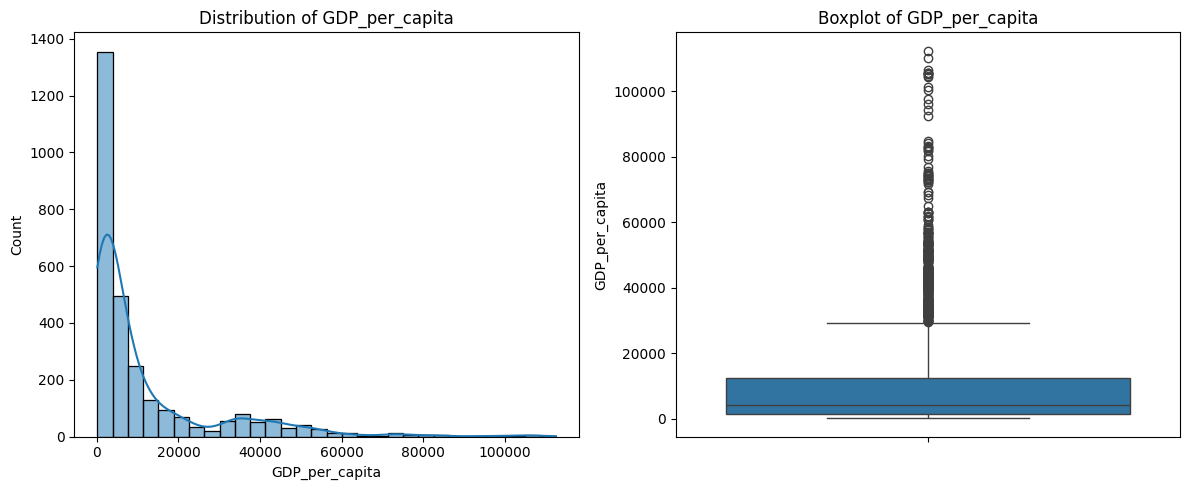


📊 **Descriptive statistics for GDP_per_capita:**
count      2864.000000
mean      11540.924930
std       16934.788931
min         148.000000
25%        1415.750000
50%        4217.000000
75%       12557.000000
max      112418.000000
Name: GDP_per_capita, dtype: float64


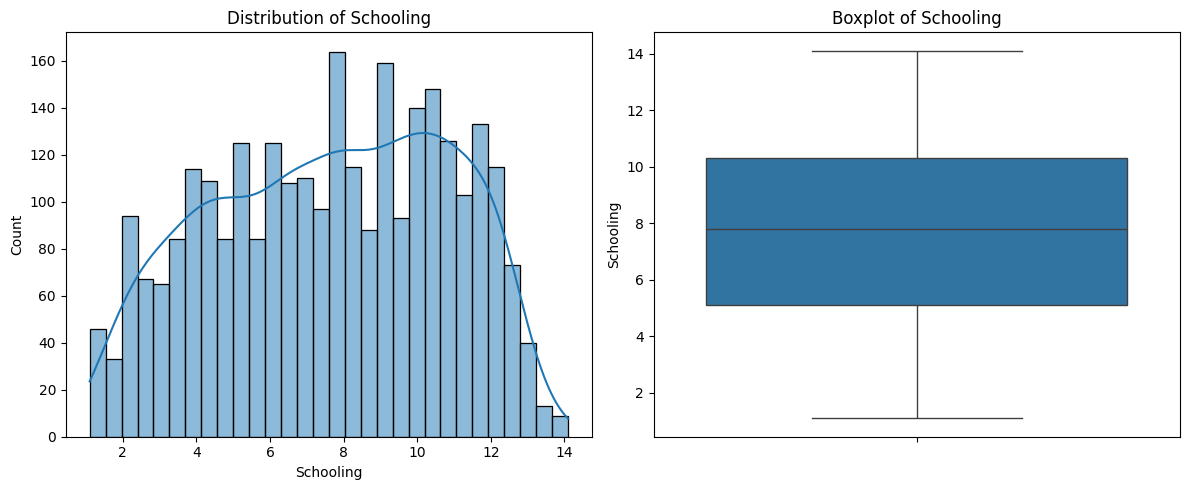


📊 **Descriptive statistics for Schooling:**
count    2864.000000
mean        7.632123
std         3.171556
min         1.100000
25%         5.100000
50%         7.800000
75%        10.300000
max        14.100000
Name: Schooling, dtype: float64


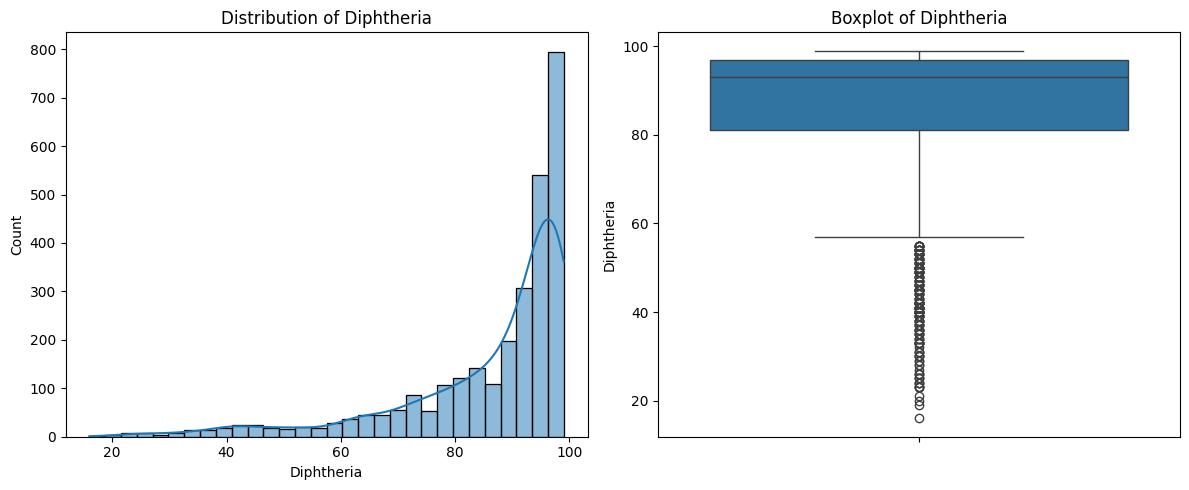


📊 **Descriptive statistics for Diphtheria:**
count    2864.000000
mean       86.271648
std        15.534225
min        16.000000
25%        81.000000
50%        93.000000
75%        97.000000
max        99.000000
Name: Diphtheria, dtype: float64


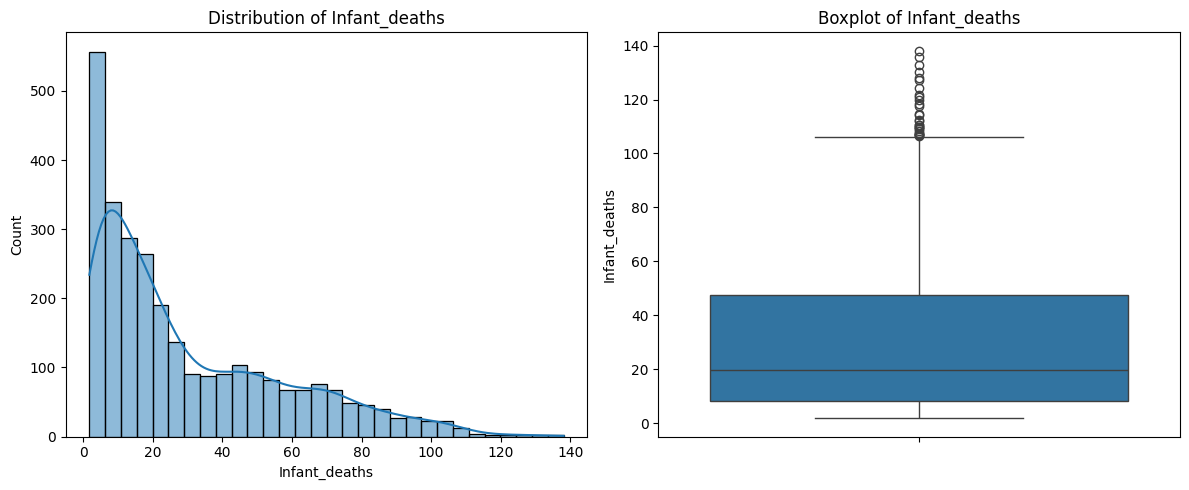


📊 **Descriptive statistics for Infant_deaths:**
count    2864.000000
mean       30.363792
std        27.538117
min         1.800000
25%         8.100000
50%        19.600000
75%        47.350000
max       138.100000
Name: Infant_deaths, dtype: float64


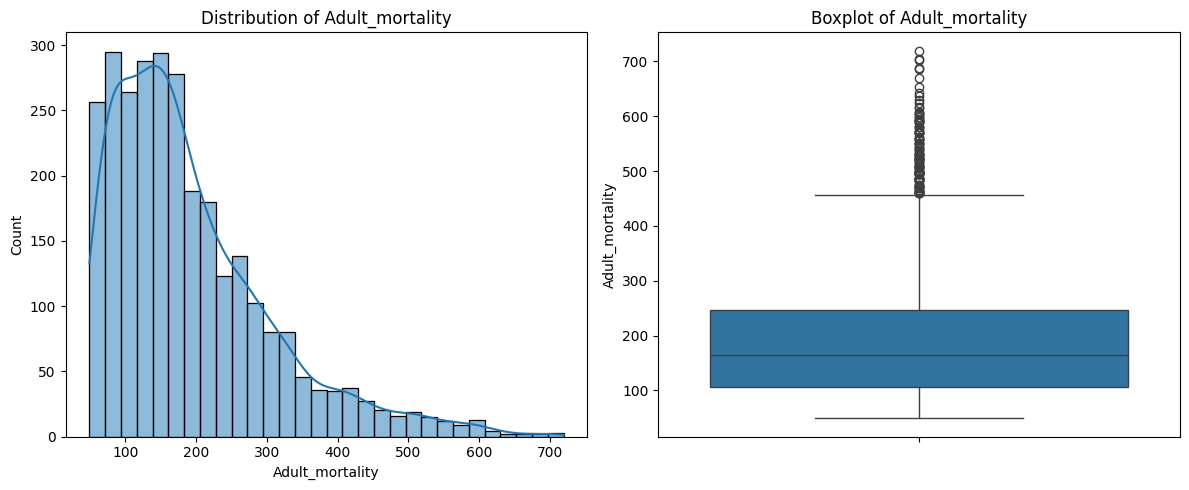


📊 **Descriptive statistics for Adult_mortality:**
count    2864.000000
mean      192.251775
std       114.910281
min        49.384000
25%       106.910250
50%       163.841500
75%       246.791375
max       719.360500
Name: Adult_mortality, dtype: float64


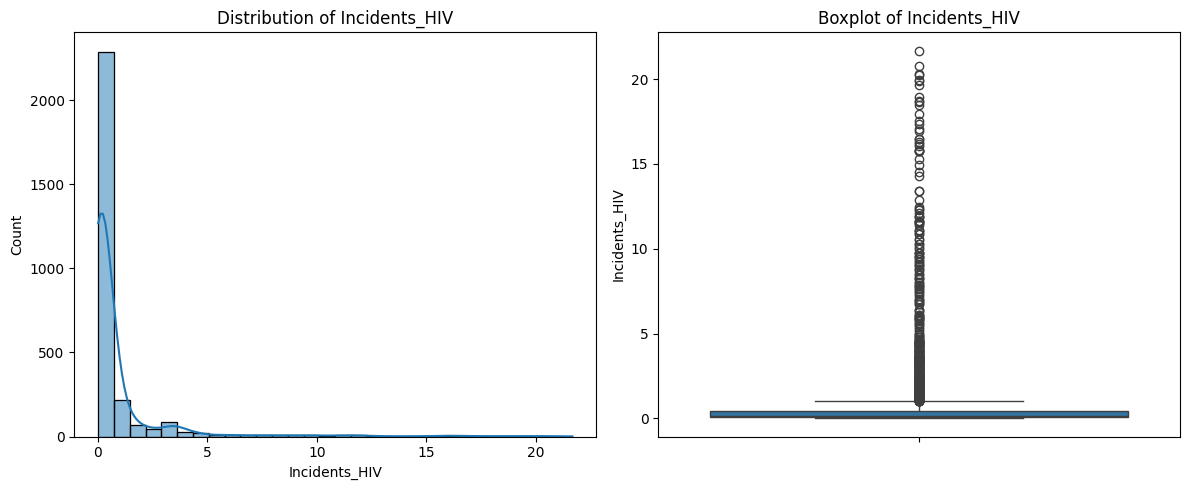


📊 **Descriptive statistics for Incidents_HIV:**
count    2864.000000
mean        0.894288
std         2.381389
min         0.010000
25%         0.080000
50%         0.150000
75%         0.460000
max        21.680000
Name: Incidents_HIV, dtype: float64


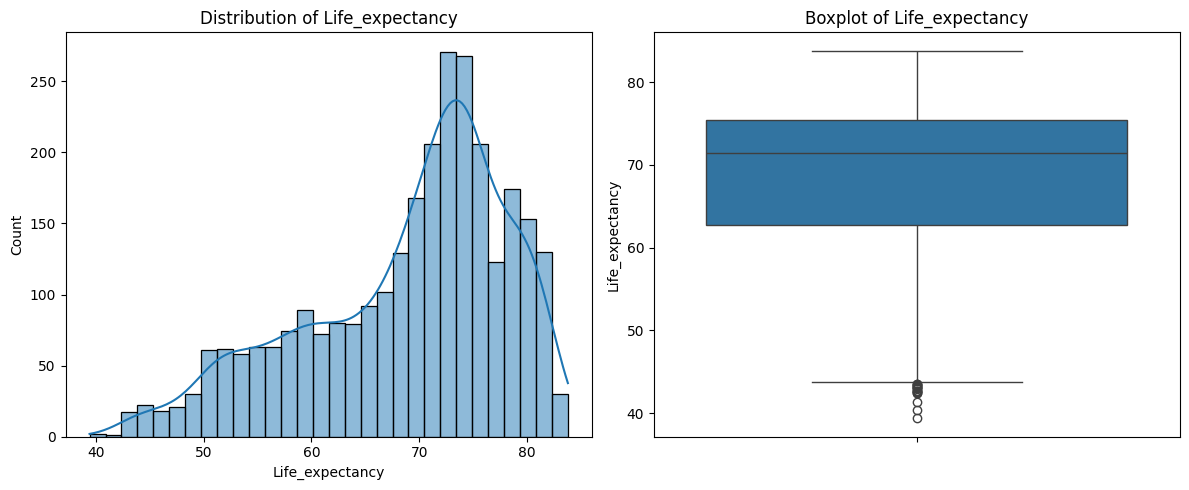


📊 **Descriptive statistics for Life_expectancy:**
count    2864.000000
mean       68.856075
std         9.405608
min        39.400000
25%        62.700000
50%        71.400000
75%        75.400000
max        83.800000
Name: Life_expectancy, dtype: float64


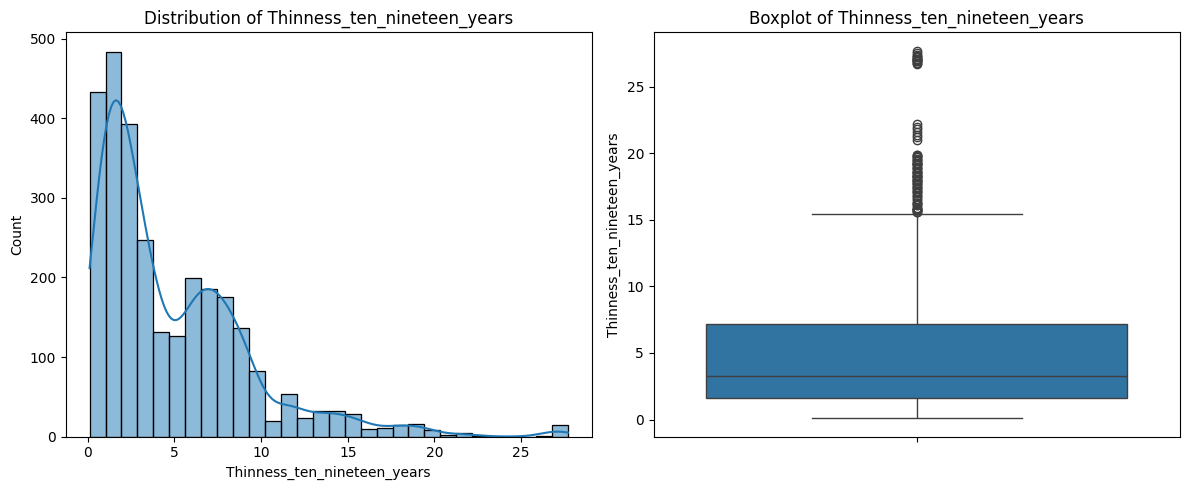


📊 **Descriptive statistics for Thinness_ten_nineteen_years:**
count    2864.000000
mean        4.865852
std         4.438234
min         0.100000
25%         1.600000
50%         3.300000
75%         7.200000
max        27.700000
Name: Thinness_ten_nineteen_years, dtype: float64


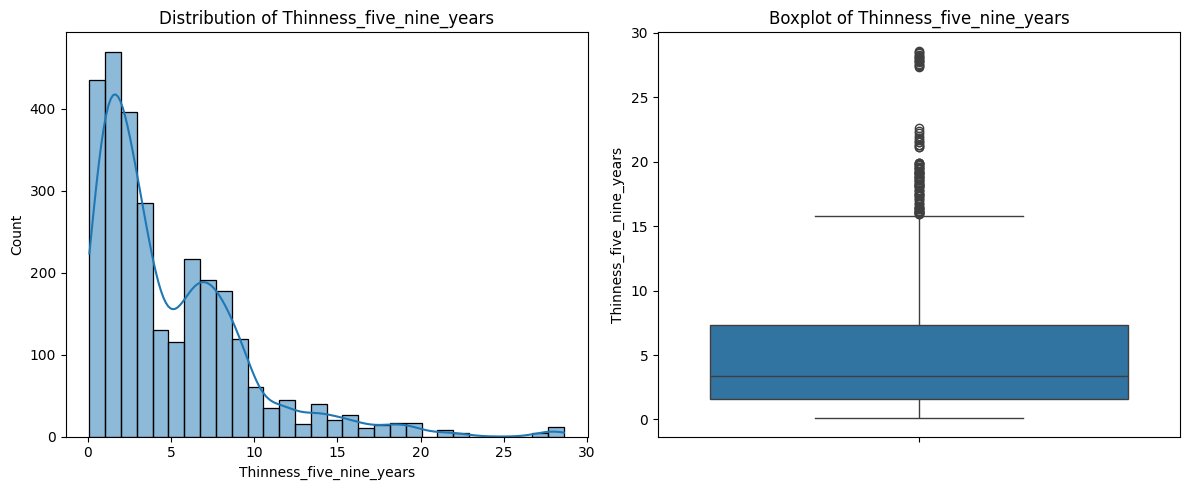


📊 **Descriptive statistics for Thinness_five_nine_years:**
count    2864.000000
mean        4.899825
std         4.525217
min         0.100000
25%         1.600000
50%         3.400000
75%         7.300000
max        28.600000
Name: Thinness_five_nine_years, dtype: float64


In [14]:
# #histogram to understand the distribution of the data

# for i in df.select_dtypes(include=[float, int]).columns:
#     plt.figure(figsize=(10, 5))
#     sns.histplot(data=df, x=i)
#     plt.show()






for col in ['GDP_per_capita', 'Schooling', 'Diphtheria', 'Infant_deaths', 
    'Adult_mortality', 'Incidents_HIV', 'Life_expectancy', 
    'Thinness_ten_nineteen_years', 'Thinness_five_nine_years']:
    
    # Create figure for both plots
    plt.figure(figsize=(12, 5))  
    
    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

    plt.tight_layout()  # Adjust layout
    plt.show()

    # Print Descriptive Statistics
    print(f"\n📊 **Descriptive statistics for {col}:**")
    print(df[col].describe())


- Checking categorical Features

C:\Users\HP\AppData\Local\Temp\ipykernel_7300\3689625441.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


<Figure size 1000x500 with 0 Axes>

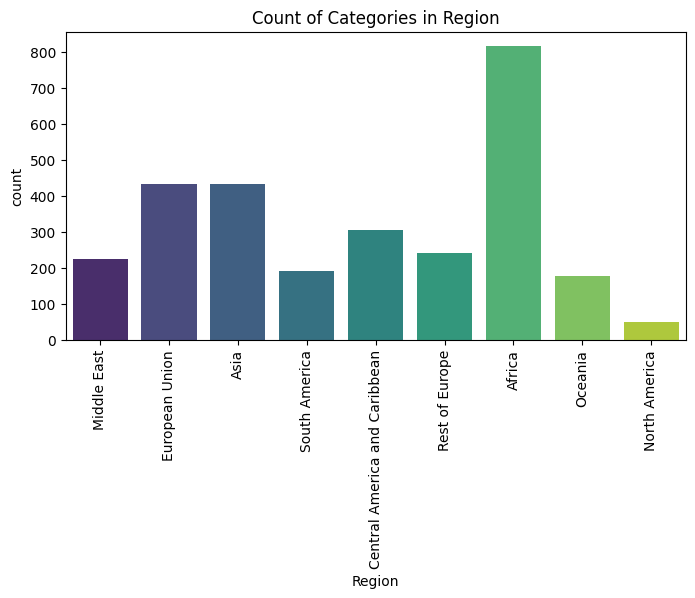

In [15]:
#Checking categorical Features

plt.figure(figsize=(10, 5))
for col in ['Region']:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.xticks(rotation=90)
    plt.title(f"Count of Categories in {col}")
    plt.show()

- Life Expectancy Distribution by Development Status

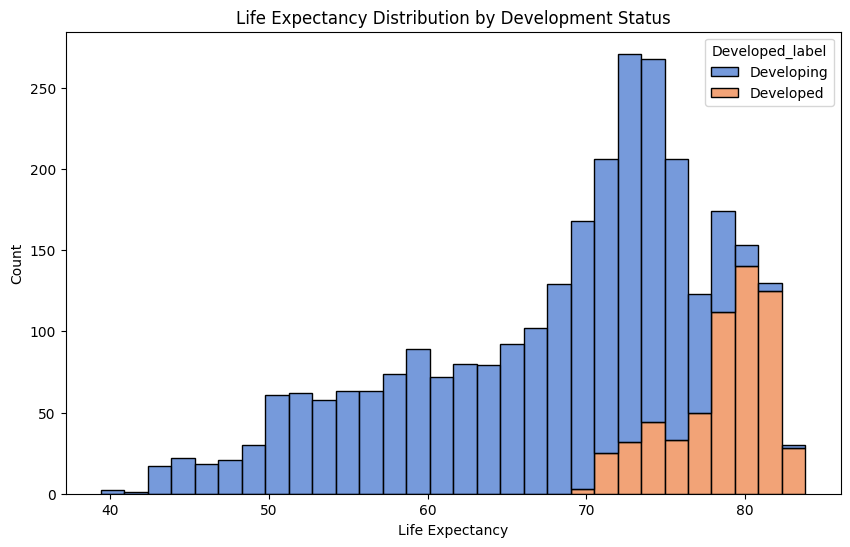

In [16]:
# Map the binary Developed column to descriptive labels
df['Developed_label'] = df['Economy_status_Developed'].map({0: 'Developing', 1: 'Developed'})

# Plot stacked histogram
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df, 
    x="Life_expectancy", 
    hue="Developed_label",
    bins=30, 
    multiple="stack",  
    palette="muted"
)

# Add labels and title
plt.title("Life Expectancy Distribution by Development Status")
plt.xlabel("Life Expectancy")
plt.ylabel("Count")

# Save the figure
plt.savefig('Life_Expectancy_by_Development.png', dpi=300)

# Show the plot
plt.show()


###  📌1.2 Identifying Outliers and Skewness
- Checking Outliers Using Boxplots

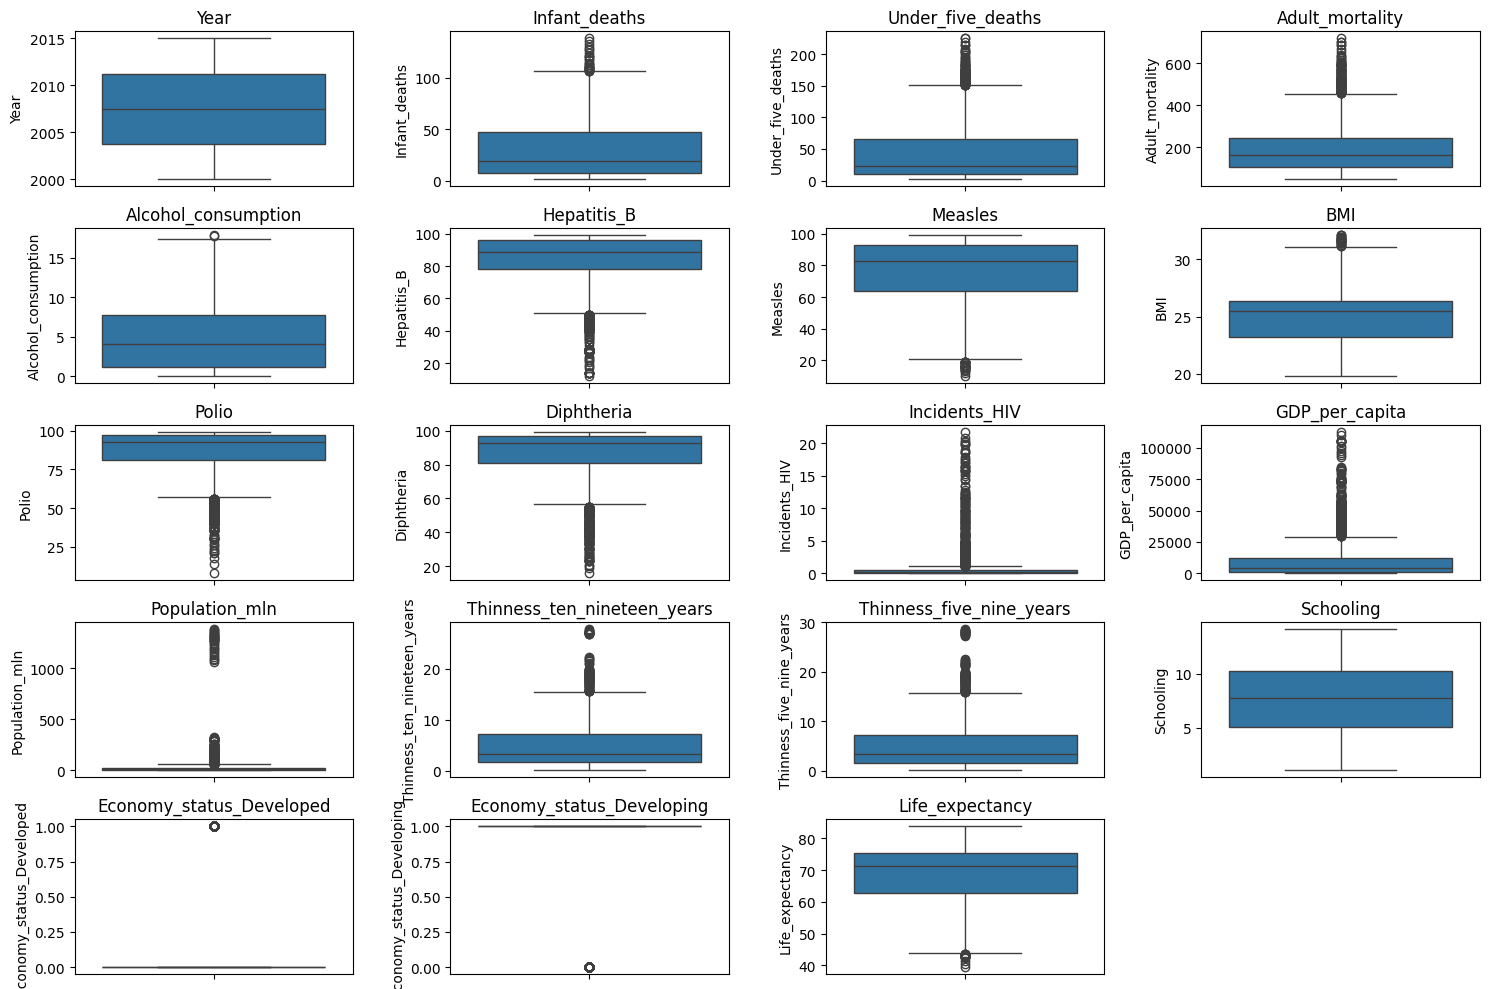

In [17]:
# Checking for outliers in the data using boxplots

plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(5, 4, i)  # Adjust based on total numeric columns
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


### 📌1.3 Understanding Categorical Distributions
- Count of Countries per Region

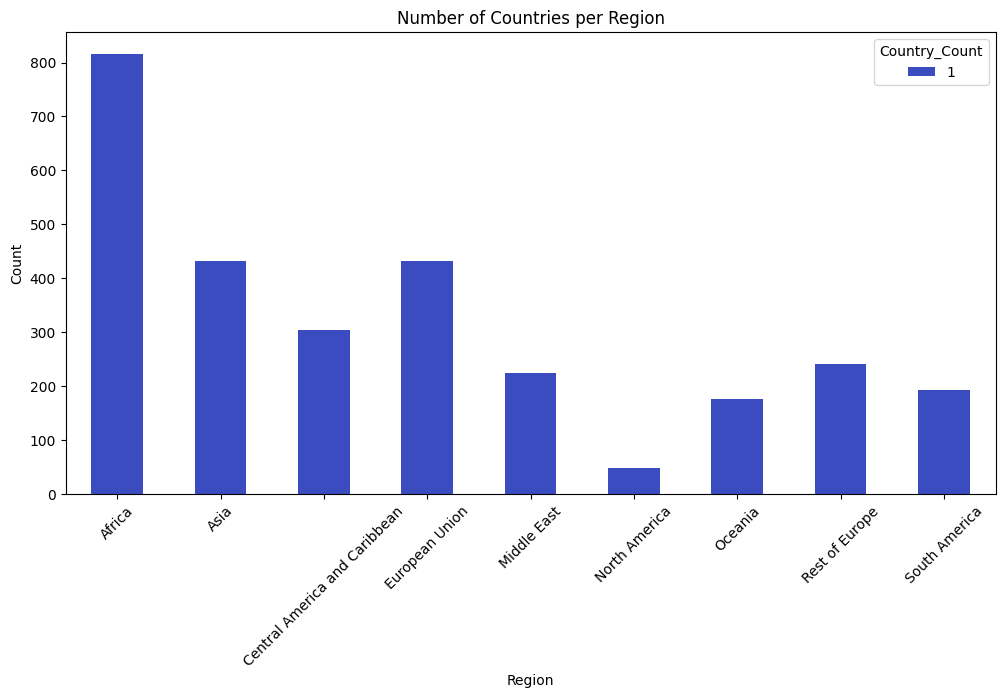

In [18]:
#count of countries per region

df['Country_Count'] = 1  # Assigning 1 to each country for count
pd.crosstab(df['Region'], df['Country_Count']).plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm")
plt.title("Number of Countries per Region")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


## 2️⃣ Feature Relationships & Correlations
#### Objective: Analyzing how different variables interact.

### 📌 2.1 Correlation Between Numerical Variables
- Heatmap to understand correlation

<Axes: >

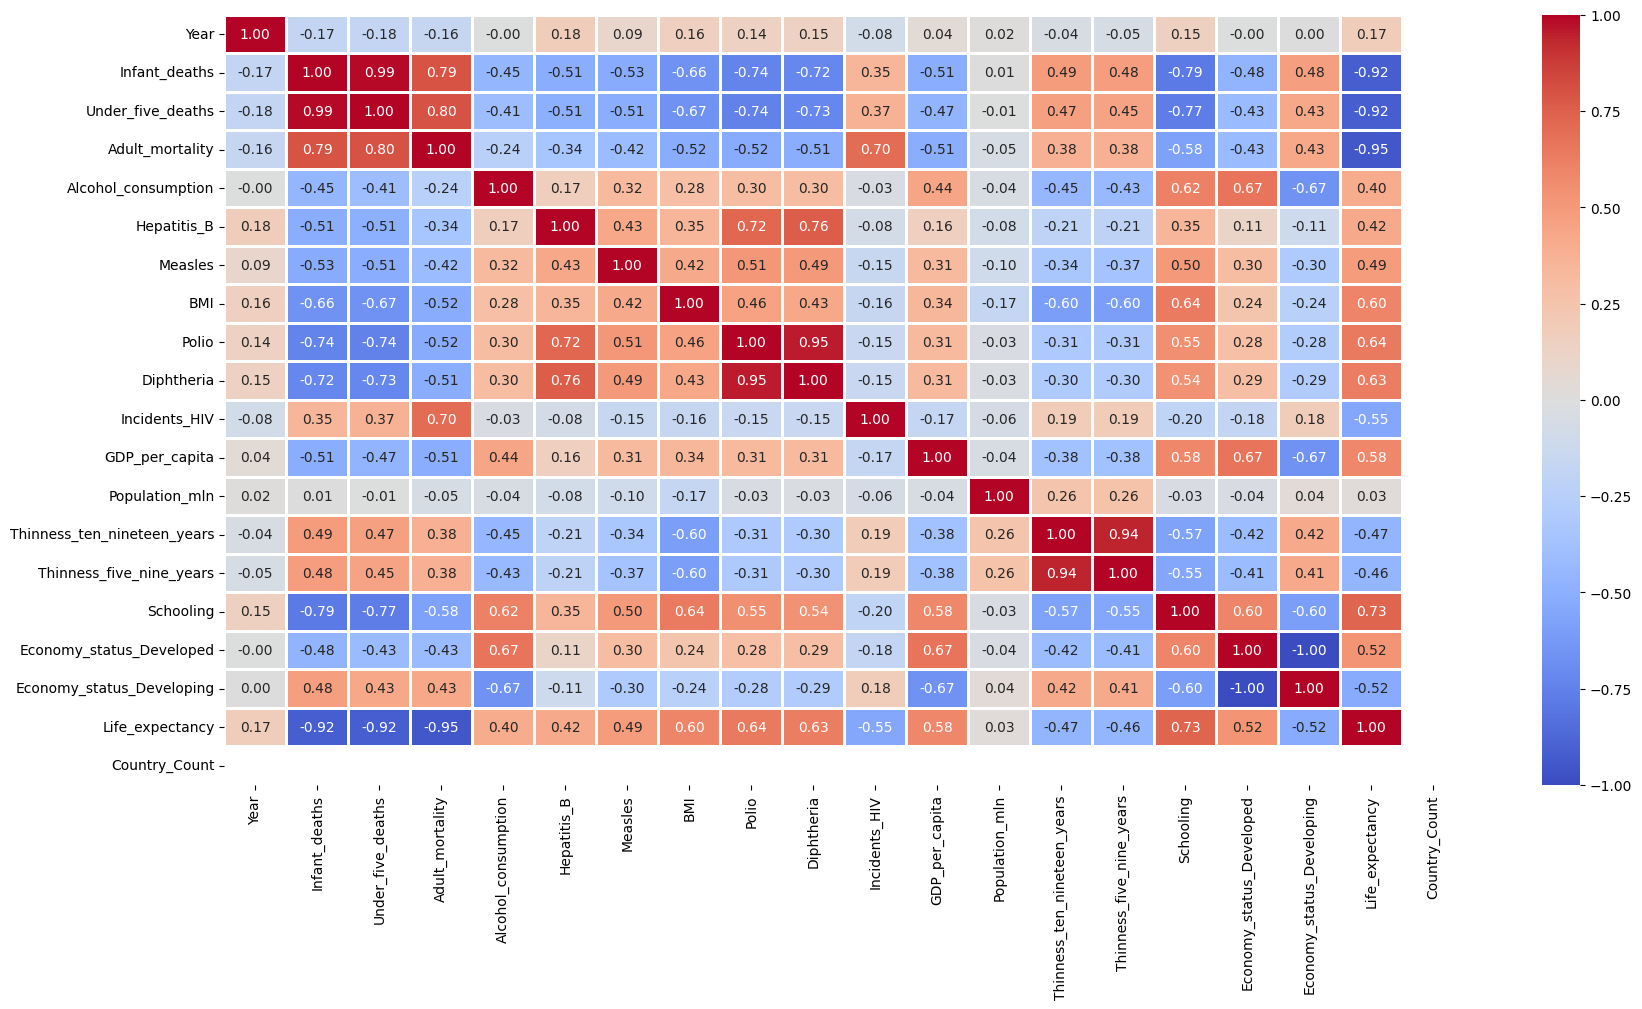

In [20]:
#correlation with heatmap to interpret the relation

c=df.select_dtypes(include='number').corr()

plt.figure(figsize=(20,10))
sns.heatmap(c,annot=True,cmap='coolwarm',fmt='.2f',linewidths=2)

### 📌 2.2 Pairwise Relationships Between Features
- Pairplot for general relationships

<Figure size 1500x1000 with 0 Axes>

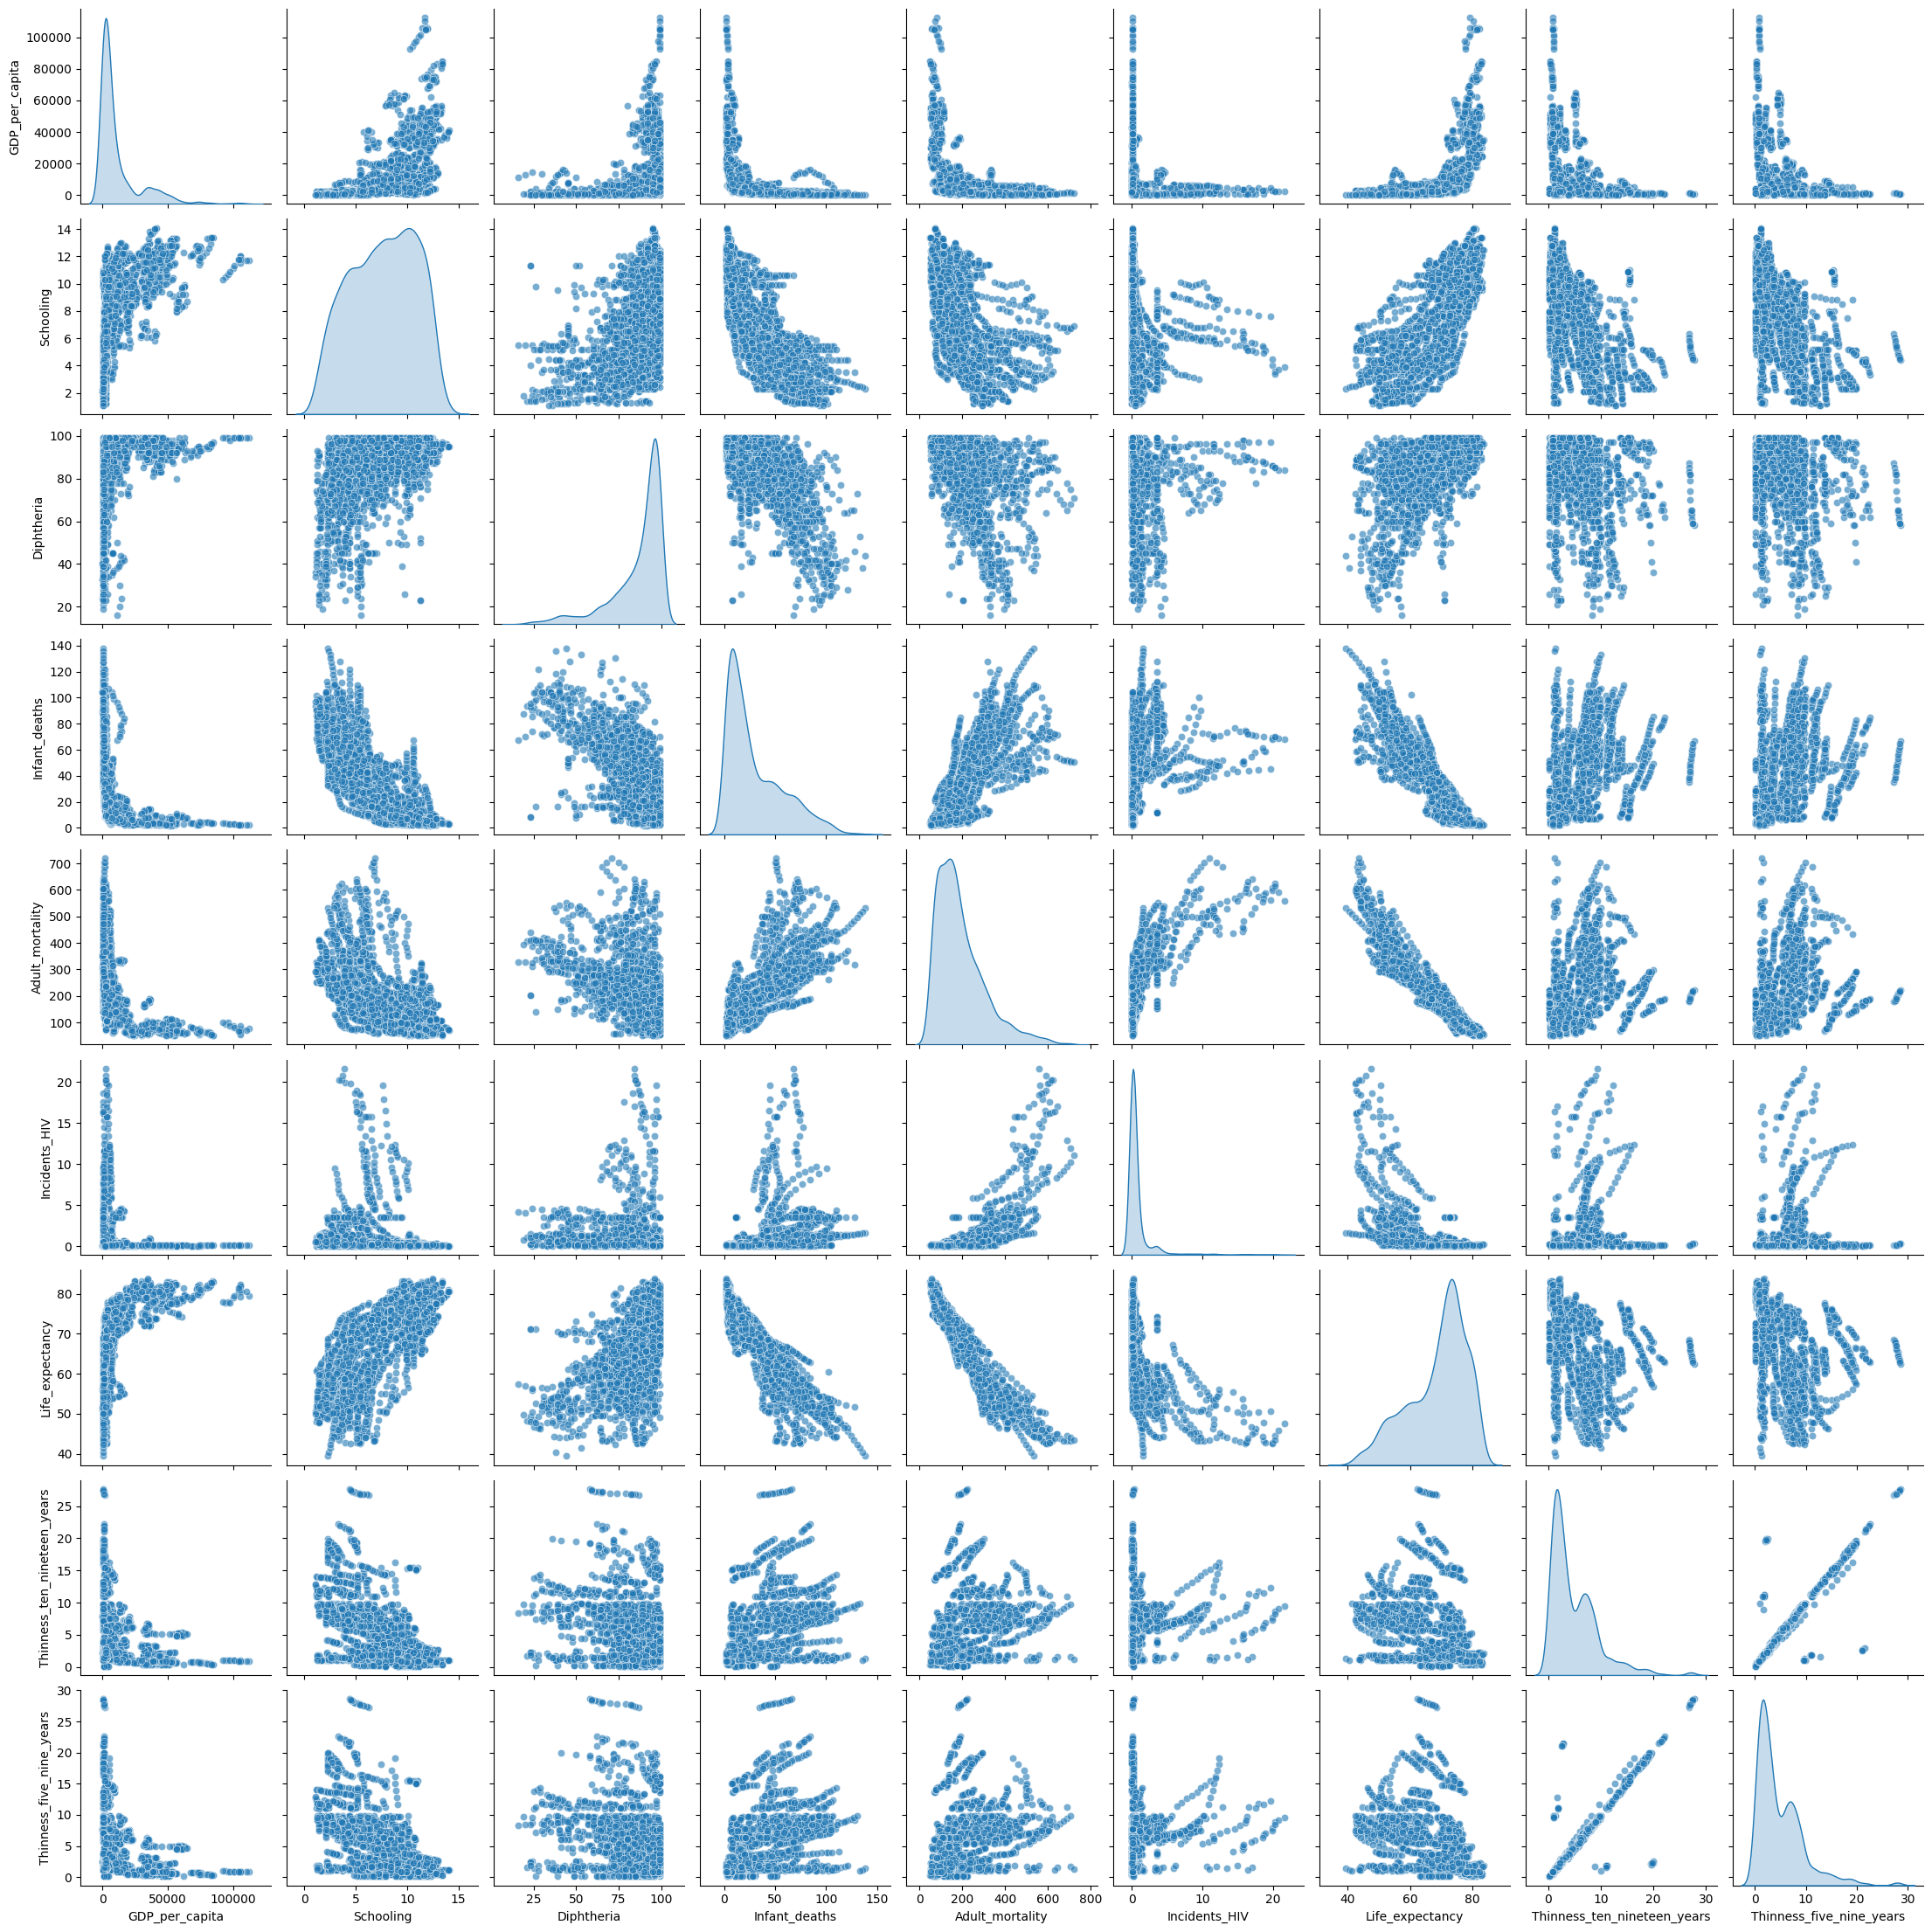

In [21]:
#using pairplot to visualize the relationship between the variables

selected_columns = ['GDP_per_capita', 'Schooling', 'Diphtheria', 'Infant_deaths', 
    'Adult_mortality', 'Incidents_HIV', 'Life_expectancy', 
    'Thinness_ten_nineteen_years', 'Thinness_five_nine_years']
plt.figure(figsize=(15, 10))
sns.pairplot(df[selected_columns], diag_kind='kde',   plot_kws={'alpha': 0.6})
plt.show()


- Pairplot including Region as a hue

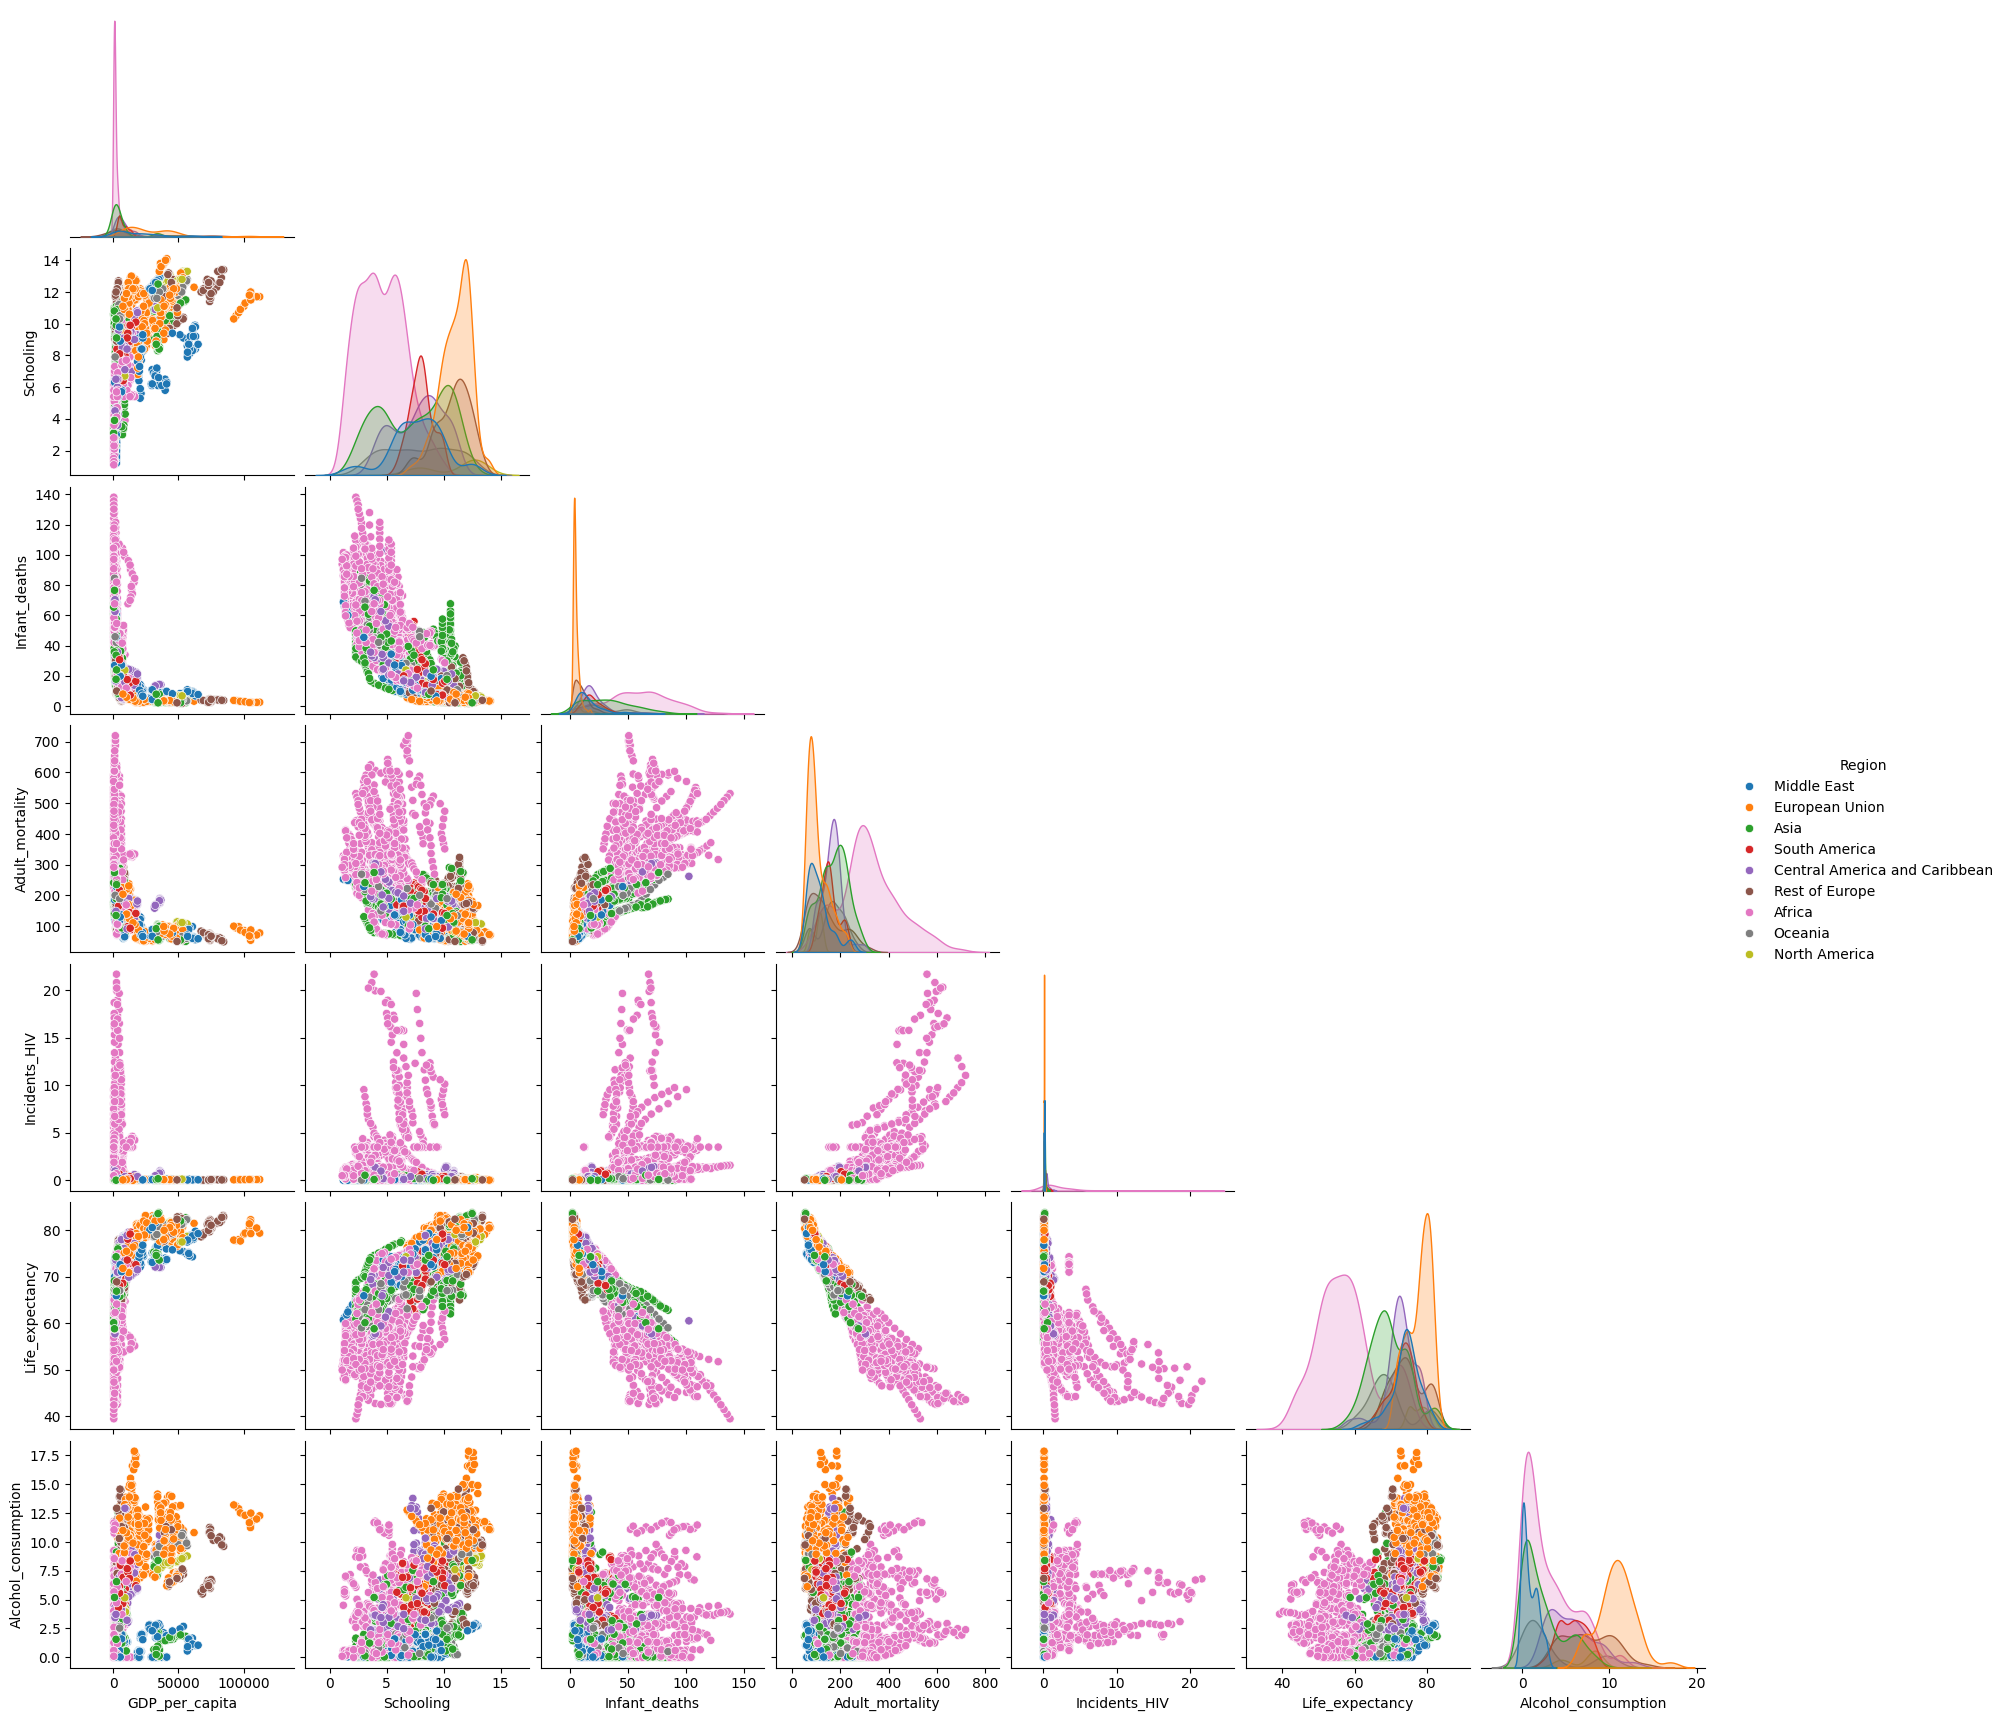

In [22]:


selected_columns = ['GDP_per_capita', 'Schooling', 'Infant_deaths', 
    'Adult_mortality', 'Incidents_HIV', 'Life_expectancy', 
    'Alcohol_consumption', 'Region']

#REGION IS INCLUDED TO SEE THE RELATIONSHIP BETWEEN VARIABLES AND REGIONS

sns.pairplot(df[selected_columns], hue='Region', diag_kind='kde', corner=True)
plt.show()


## 3️⃣ Geographical & Regional Analysis
Objective: Exploring life expectancy and economic factors across different regions.

### 📌 3.1 Population and GDP Distribution by Region
- Population distribution by region

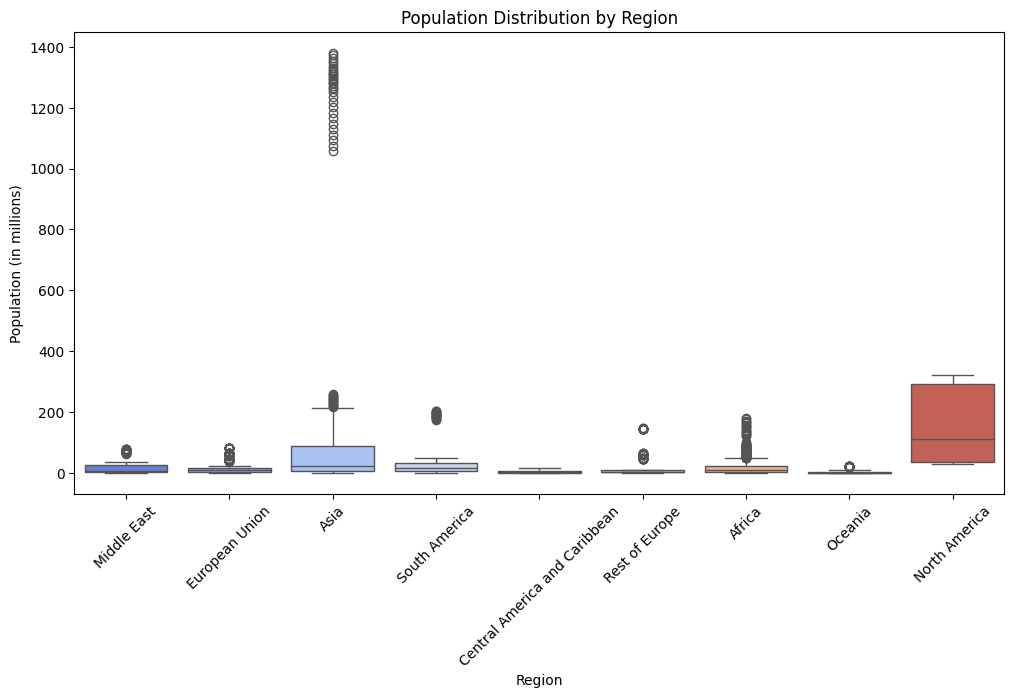

In [124]:
# Population distribution by region

plt.figure(figsize=(12, 6)) 

sns.boxplot(data=df, x="Region", y="Population_mln", palette="coolwarm") # Boxplot
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.title("Population Distribution by Region") # Title
plt.ylabel("Population (in millions)") # y-axis label
plt.show()


- Average GDP per capita across regions

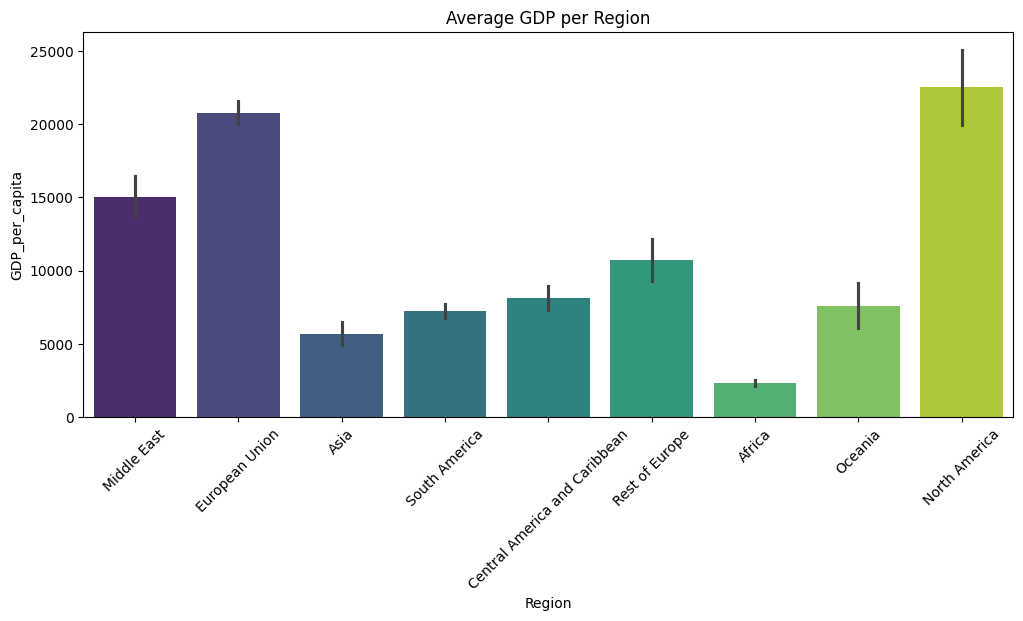

In [125]:
#average GDP per capita across regions

plt.figure(figsize=(12, 5))
sns.barplot(x=df['Region'], y=df['GDP_per_capita'], estimator=np.mean, palette="viridis")
plt.xticks(rotation=45)
plt.title("Average GDP per Region")
plt.show()


### 📌 3.2 Life Expectancy Across Regions
- Life expectancy distribution across regions

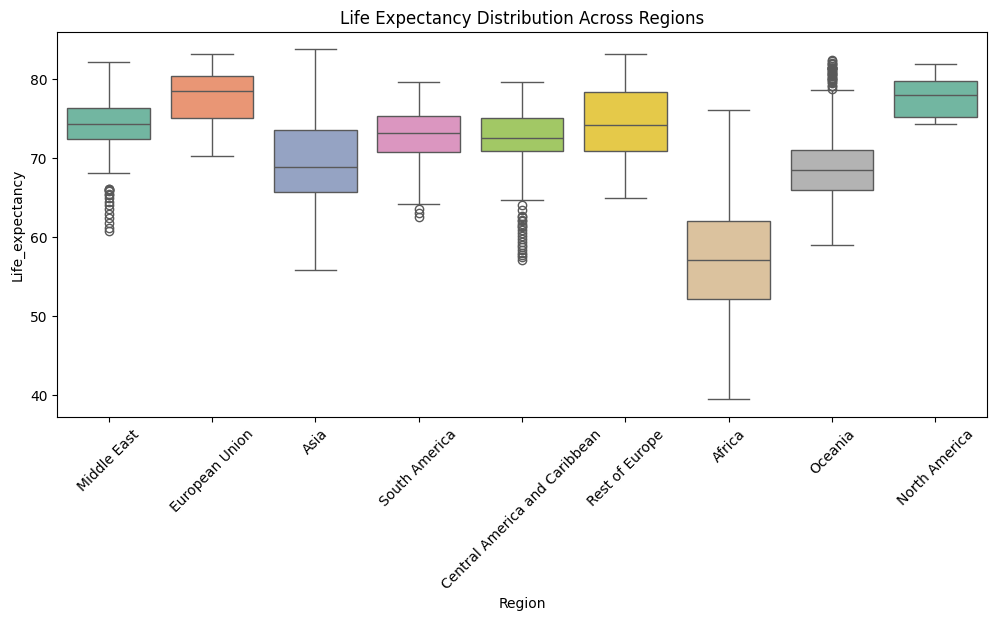

In [126]:
#Life expectancy distribution across regions

plt.figure(figsize=(12, 5))
sns.boxplot(x=df['Region'], y=df['Life_expectancy'], palette="Set2")
plt.xticks(rotation=45)
plt.title("Life Expectancy Distribution Across Regions")
plt.show()


- Life Expectancy Across Countries

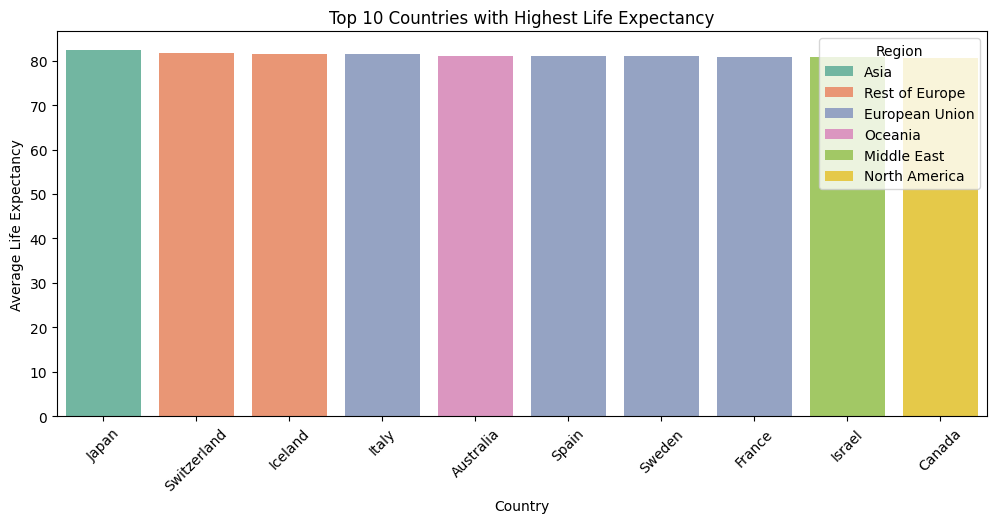

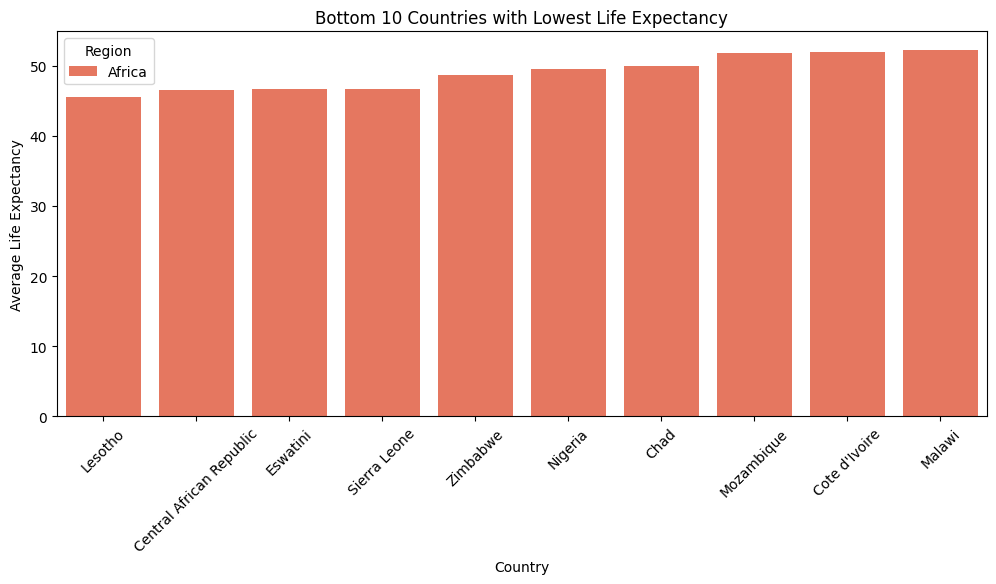

In [118]:
# # Get average life expectancy per country
# avg_life_expectancy = df.groupby('Country')['Life_expectancy'].mean().sort_values()

# # Top 10 Countries with Highest Life Expectancy
# plt.figure(figsize=(12, 5))
# sns.barplot(x=avg_life_expectancy.tail(10).index, y=avg_life_expectancy.tail(10).values, palette="Greens")
# plt.xticks(rotation=45)
# plt.title("Top 10 Countries with Highest Life Expectancy")
# plt.ylabel("Average Life Expectancy")
# plt.show()

# # Bottom 10 Countries with Lowest Life Expectancy
# plt.figure(figsize=(12, 5))
# sns.barplot(x=avg_life_expectancy.head(10).index, y=avg_life_expectancy.head(10).values, palette="Reds")
# plt.xticks(rotation=45)
# plt.title("Bottom 10 Countries with Lowest Life Expectancy")
# plt.ylabel("Average Life Expectancy")
# plt.show()

# Get average life expectancy per country & region
avg_life_expectancy = df.groupby(['Country', 'Region'])['Life_expectancy'].mean().reset_index()

# Top 10 Countries with Highest Life Expectancy
top_10 = avg_life_expectancy.nlargest(10, 'Life_expectancy')

plt.figure(figsize=(12, 5))
sns.barplot(x="Country", y="Life_expectancy", hue="Region", data=top_10, palette="Set2")
plt.xticks(rotation=45)
plt.title("Top 10 Countries with Highest Life Expectancy")
plt.ylabel("Average Life Expectancy")
plt.legend(title="Region")
plt.show()

# Bottom 10 Countries with Lowest Life Expectancy
bottom_10 = avg_life_expectancy.nsmallest(10, 'Life_expectancy')

plt.figure(figsize=(12, 5))
sns.barplot(x="Country", y="Life_expectancy", hue="Region", data=bottom_10, palette="Reds")
plt.xticks(rotation=45)
plt.title("Bottom 10 Countries with Lowest Life Expectancy")
plt.ylabel("Average Life Expectancy")
plt.legend(title="Region")
plt.show()


- Life Expectancy of Developed and under-Developed Countries

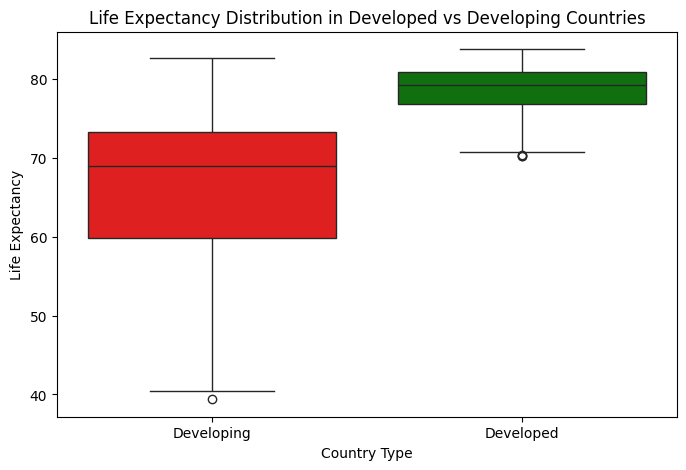

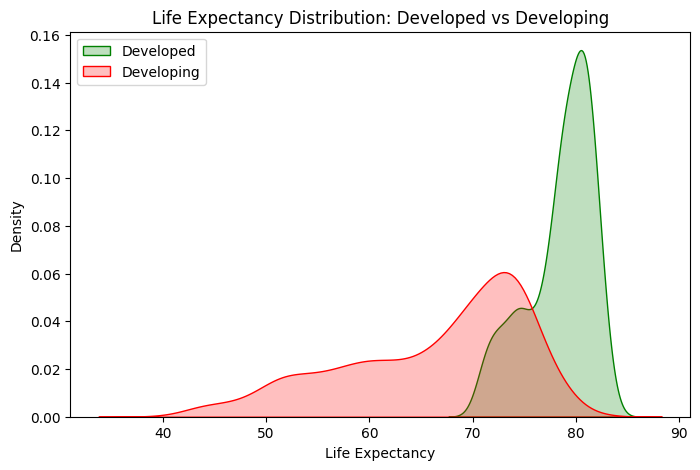

In [127]:
# Boxplot for Developed vs Developing Countries
plt.figure(figsize=(8, 5))
sns.boxplot(x="Developed_label", y="Life_expectancy", data=df, palette=["red", "green"])
plt.title("Life Expectancy Distribution in Developed vs Developing Countries")
plt.xlabel("Country Type")
plt.ylabel("Life Expectancy")
plt.show()

# KDE Plot for Density Distribution
plt.figure(figsize=(8, 5))
sns.kdeplot(df[df["Economy_status_Developed"] == 1]["Life_expectancy"], label="Developed", shade=True, color="green")
sns.kdeplot(df[df["Economy_status_Developing"] == 1]["Life_expectancy"], label="Developing", shade=True, color="red")
plt.title("Life Expectancy Distribution: Developed vs Developing")
plt.xlabel("Life Expectancy")
plt.ylabel("Density")
plt.legend()
plt.show()


## 4️⃣ Key Variable Comparisons
Objective: Exploring the relationships between key predictors and life expectancy.
### 📌 4.1 Relationship Between Life Expectancy and Various Factors
- Scatter plots for multiple features against Life Expectancy

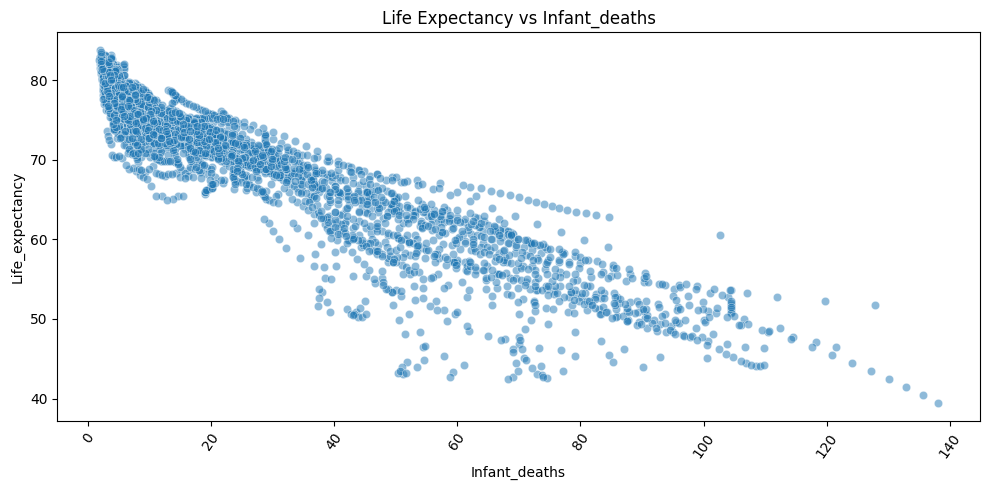

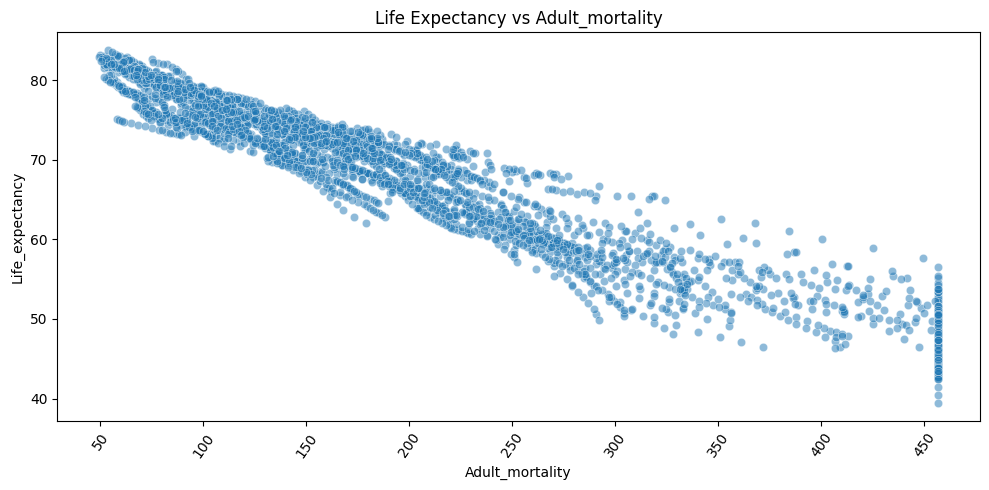

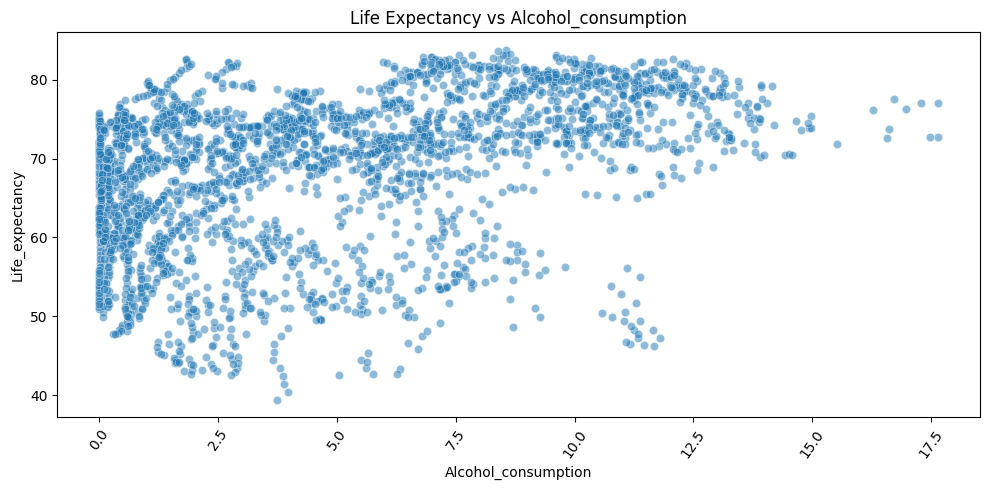

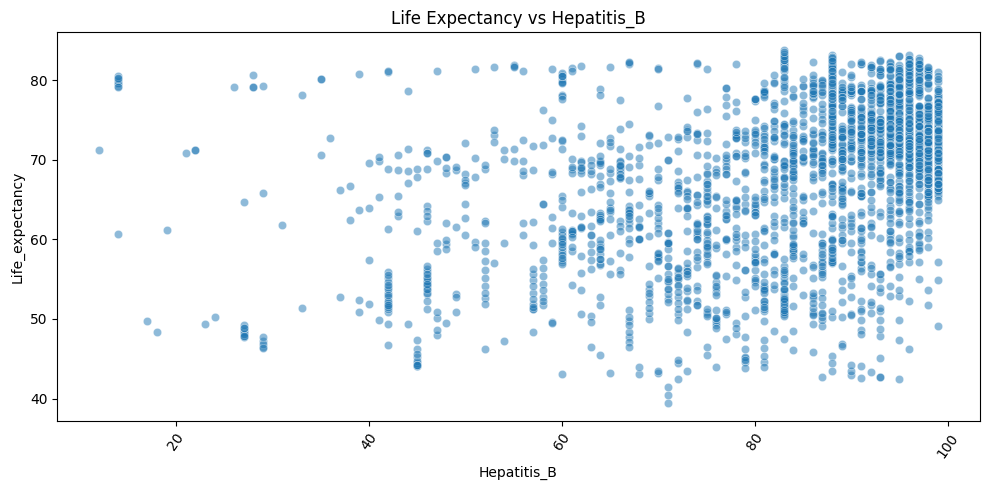

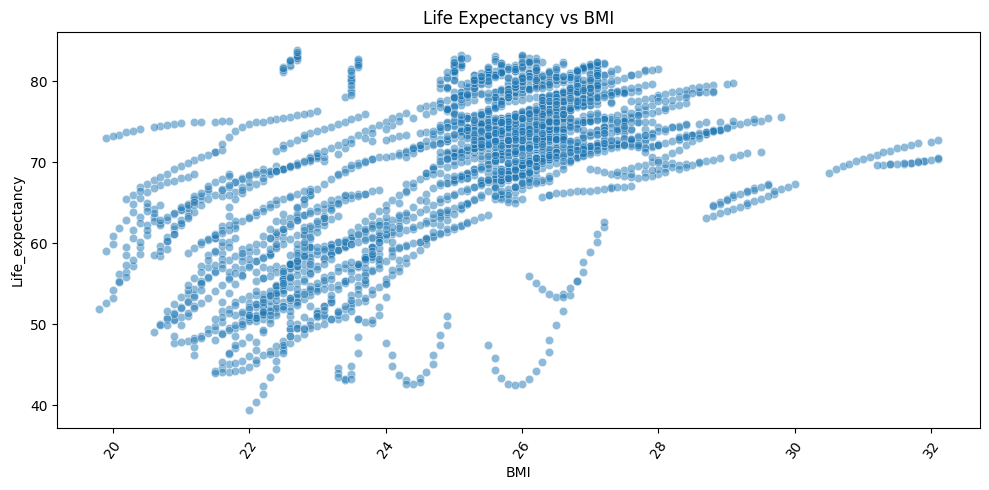

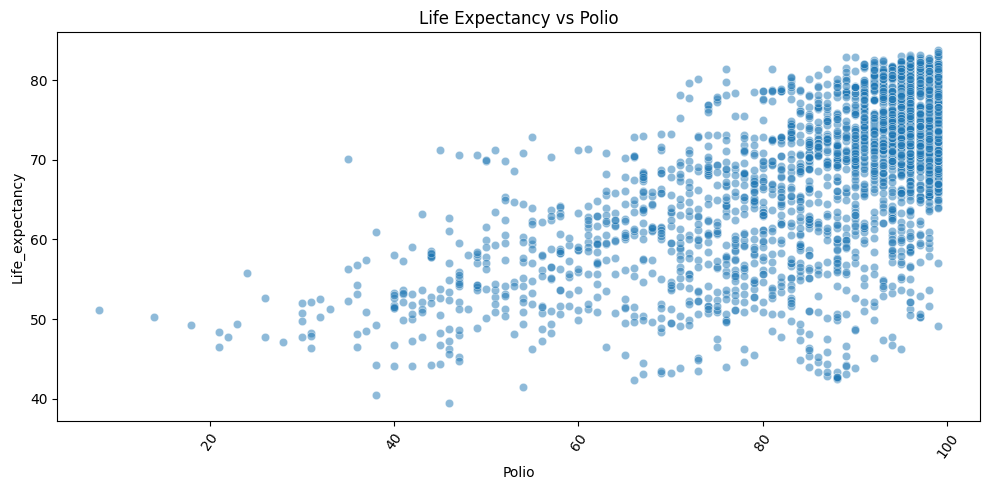

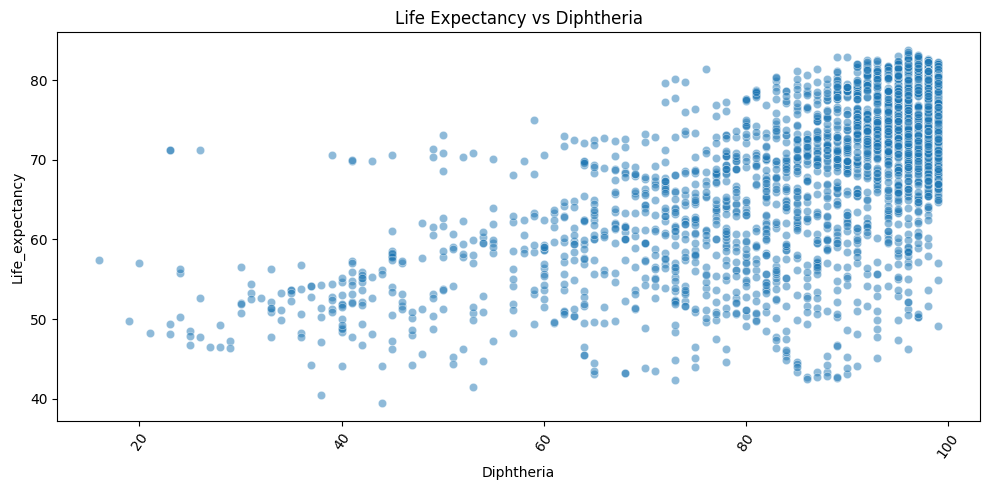

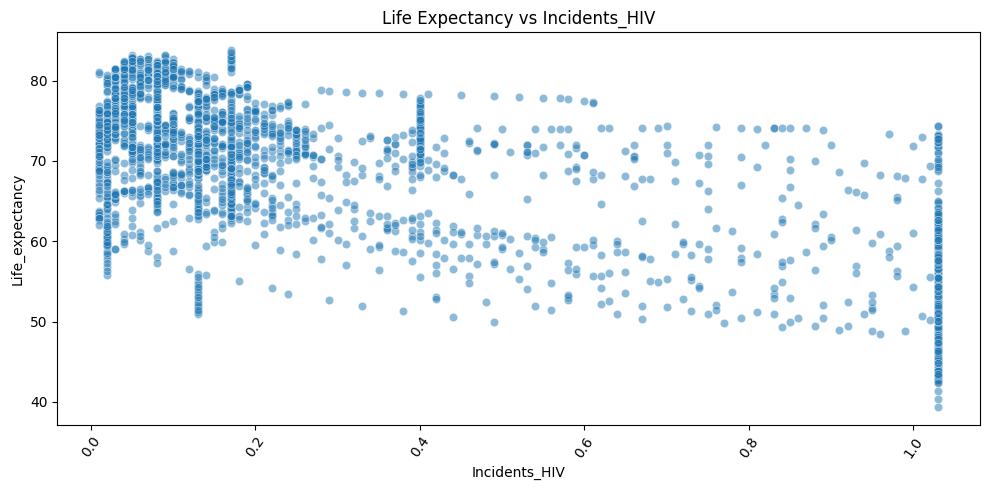

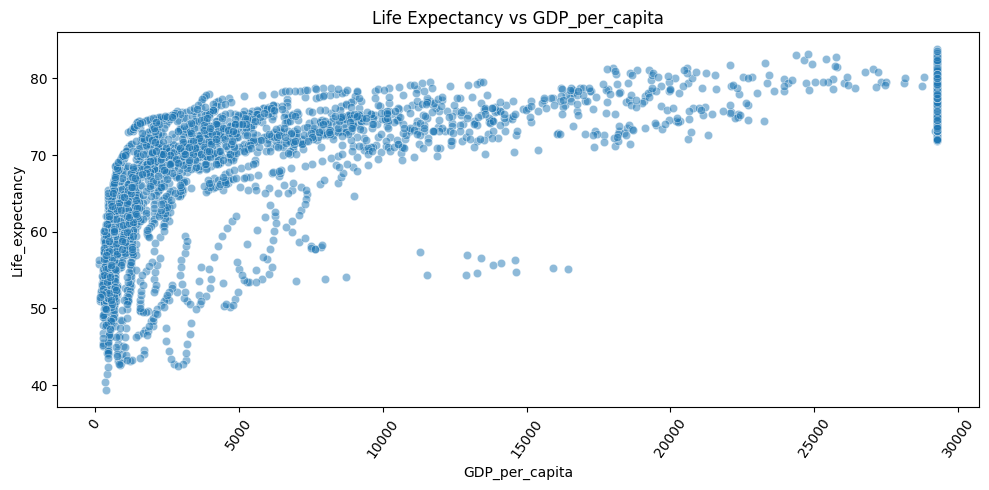

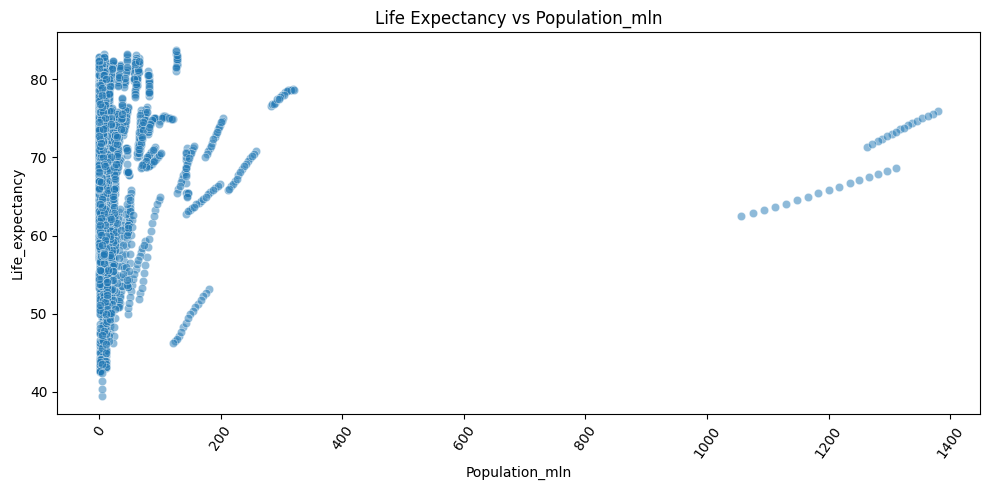

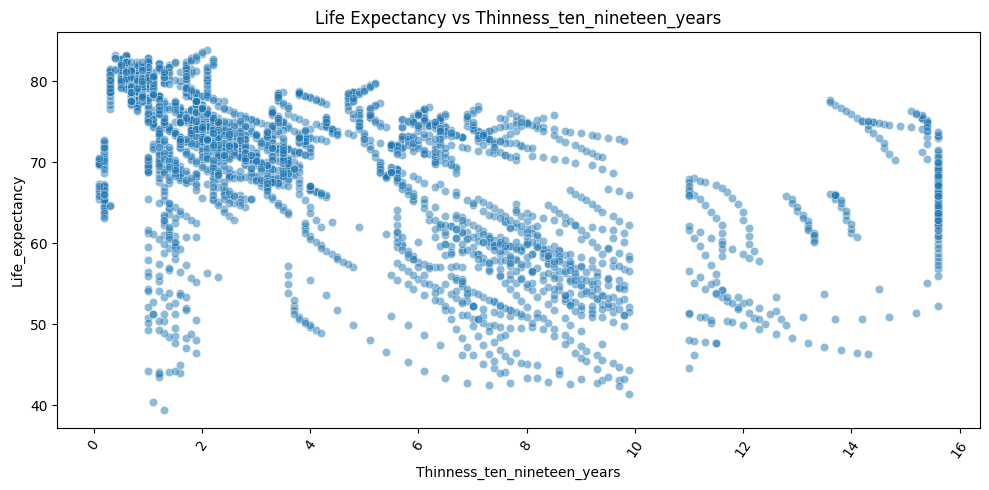

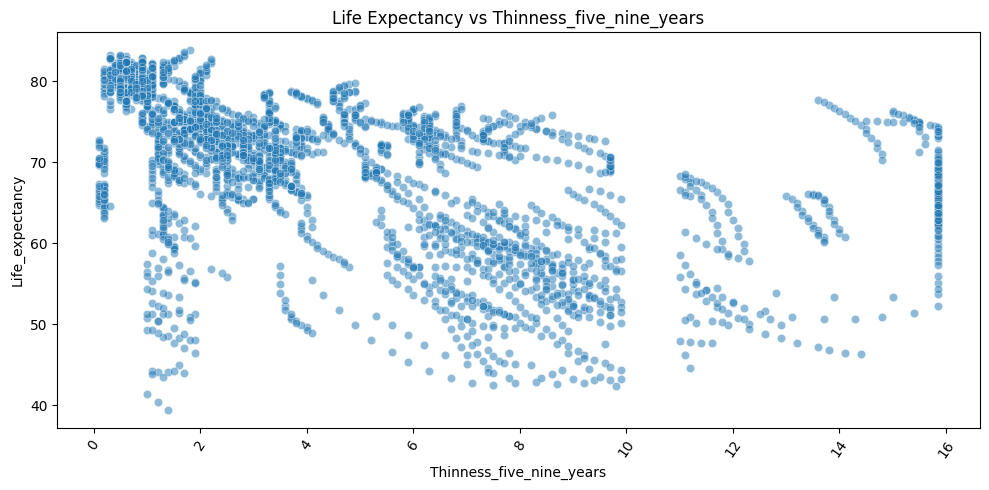

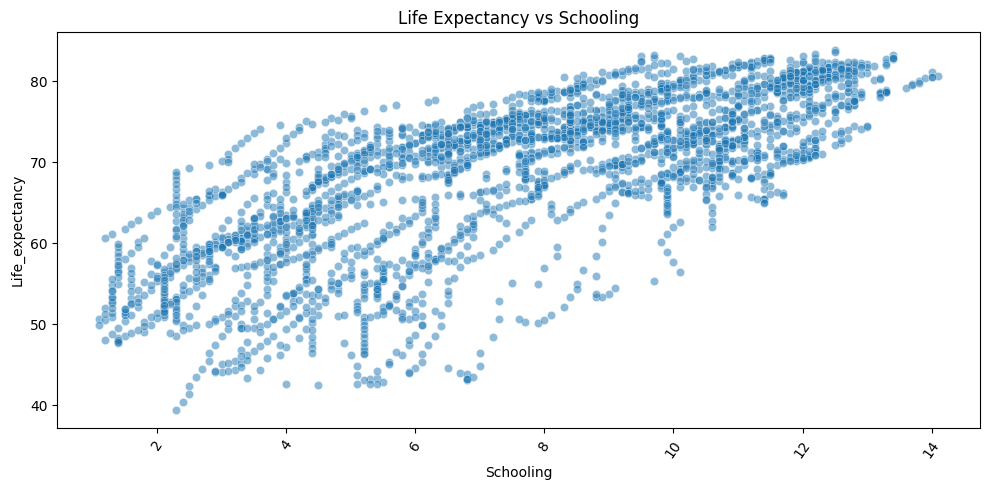

In [119]:
# Scatter Plot to understand relationship between variables


for i in ['Infant_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling']:
    plt.figure(figsize=(10, 5))
    plt.xticks(rotation=55)
    sns.scatterplot(data=df,x=i,y='Life_expectancy',alpha=0.5)
    plt.title(f'Life Expectancy vs {i}') 
    plt.tight_layout()
    plt.show()

### 📌 4.2 Impact of Economic & Health Factors on Life Expectancy
- GDP per capita vs Life Expectancy

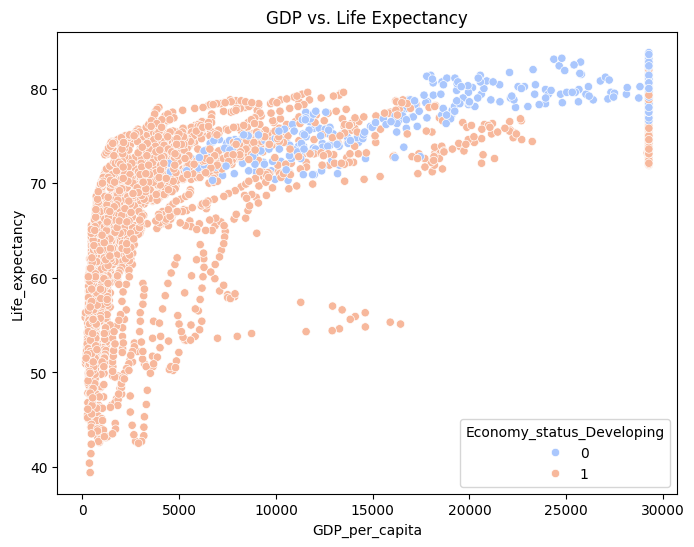

In [115]:
#Checking the relationship between GDP per capita and Life Expectancy

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='GDP_per_capita', y='Life_expectancy', hue='Economy_status_Developing', palette='coolwarm')
plt.title("GDP vs. Life Expectancy")
plt.show()


- Adult Mortality vs Life Expectancy

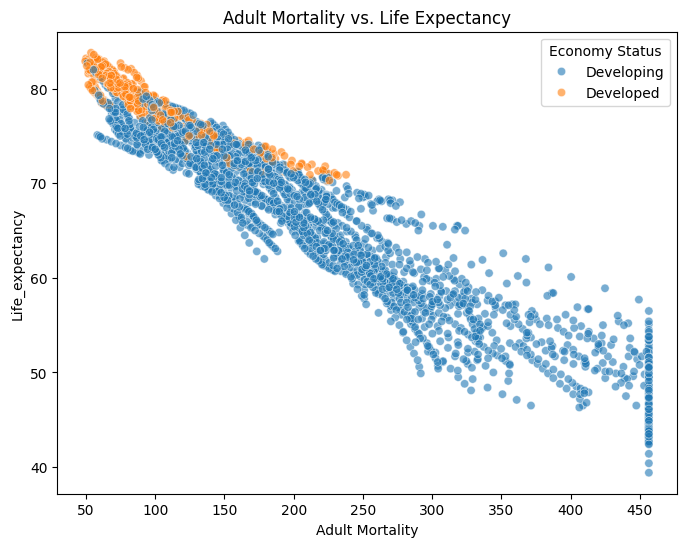

In [112]:
# Checking the relationship between adult mortality and life expectancy 

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Adult_mortality', y='Life_expectancy', alpha=0.6, hue=df['Economy_status_Developing'].map({1: "Developing", 0: "Developed"}))
plt.xlabel("Adult Mortality")
plt.title("Adult Mortality vs. Life Expectancy")
plt.legend(title='Economy Status')
plt.show()


- Schooling vs Life Expectancy

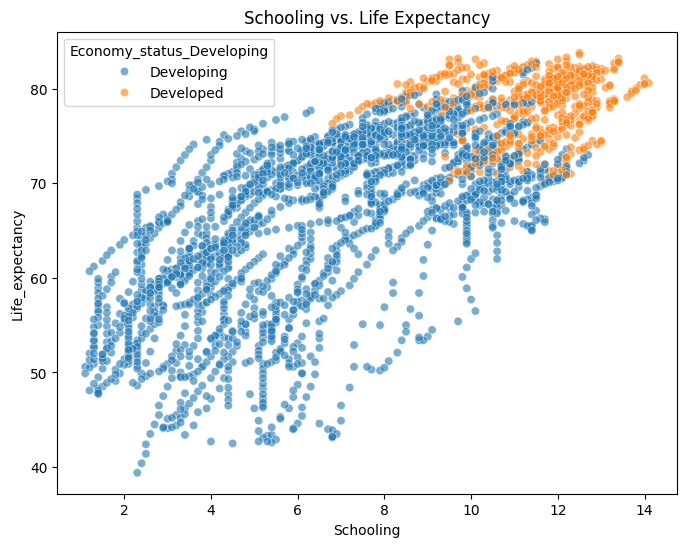

In [113]:
# Checking the relationship between adult mortality and life expectancy 

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Schooling', y='Life_expectancy', alpha=0.6, hue=df['Economy_status_Developing'].map({1: "Developing", 0: "Developed"}))
plt.xlabel("Schooling")
plt.title("Schooling vs. Life Expectancy")
plt.show()


- Alcohol Consumption vs Life Expectancy

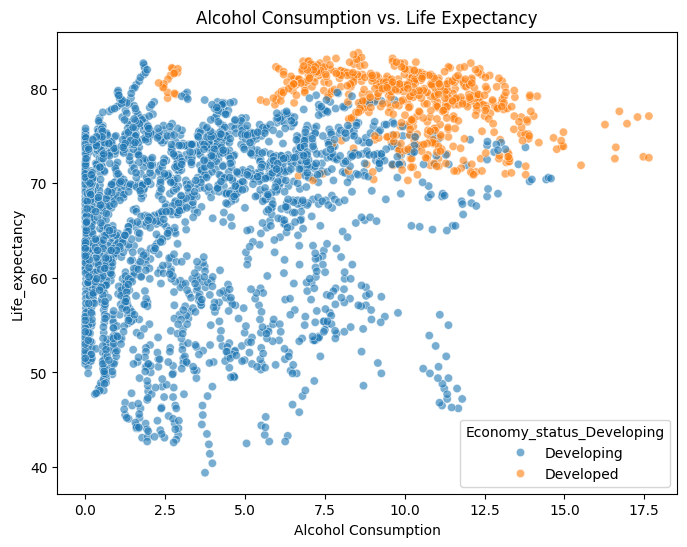

In [121]:
# Checking the relationship between adult mortality and life expectancy 

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Alcohol_consumption', y='Life_expectancy', alpha=0.6, hue=df['Economy_status_Developing'].map({1: "Developing", 0: "Developed"}))
plt.xlabel("Alcohol Consumption")
plt.title("Alcohol Consumption vs. Life Expectancy")
plt.show()


## 5️⃣ Multi-Variable Analysis
Objective: Analyzing interactions between more than two variables.
- Faceted Scatter Plot of GDP vs Life Expectancy by Economy Status

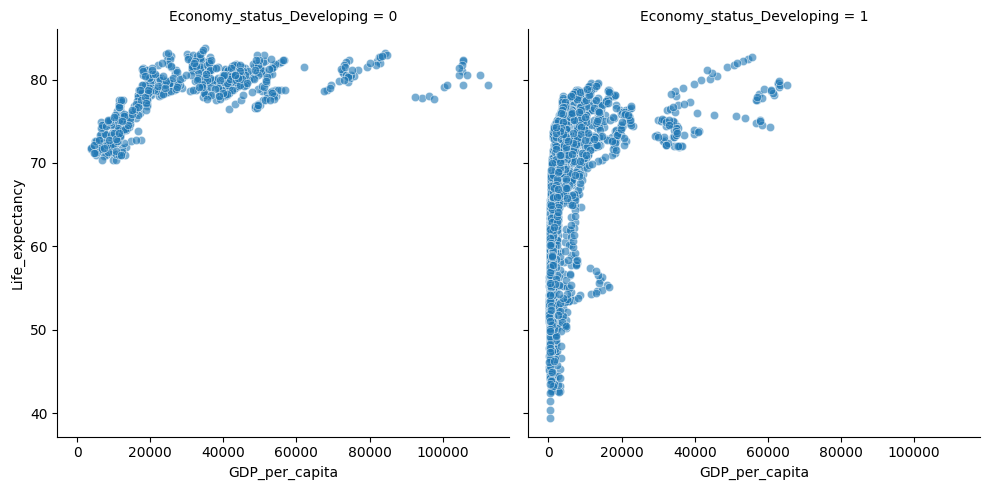

In [29]:
## visualizing more than two numerical variables with a categorical filter

g = sns.FacetGrid(df, col="Economy_status_Developing", height=5)

#map the scatter plot 

g.map(sns.scatterplot, "GDP_per_capita", "Life_expectancy", alpha=0.6)
plt.show()


- Temporal Analysis (Time-Based Trends)

In [ ]:
# plt.figure(figsize=(10,6))

# df_yearly = df.groupby('Year')['Life_expectancy'].mean().reset_index()
# sns.lineplot(x='Year', y='Life_expectancy', data=df_yearly, marker='o')
# plt.title("Average Life Expectancy Over Years")
# plt.xlabel("Year")
# plt.ylabel("Average Life Expectancy")
# plt.savefig('Life_exp_vs_Year.png', dpi=300)
# plt.show()


Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy', 'Developed_label',
       'Country_Count'],
      dtype='object')

## Analyzing Trends Over Time in Developing and Developed Countries

### 1.Examining Changes in Key Indicators Over Time

- How has life expectancy evolved?
- Has GDP per capita improved?
- Is adult mortality decreasing?
- Are schooling years increasing?


In [70]:
developing_df = df[df["Economy_status_Developing"] == 1]
developed_df = df[df["Economy_status_Developed"] == 1]




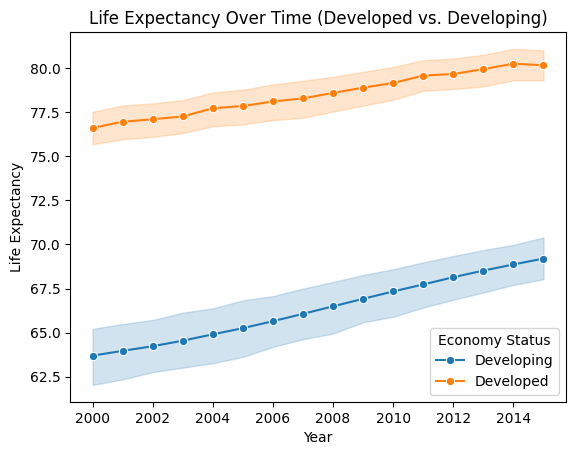

In [72]:
## Life Expectancy Trend in Developing Countries

# Plot line chart for Developing countries
sns.lineplot(x="Year", y="Life_expectancy", data=developing_df, label="Developing", marker='o')

# Plot line chart for Developed countries
sns.lineplot(x="Year", y="Life_expectancy", data=developed_df, label="Developed", marker='o')

plt.title("Life Expectancy Over Time (Developed vs. Developing)")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.legend(title="Economy Status")
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

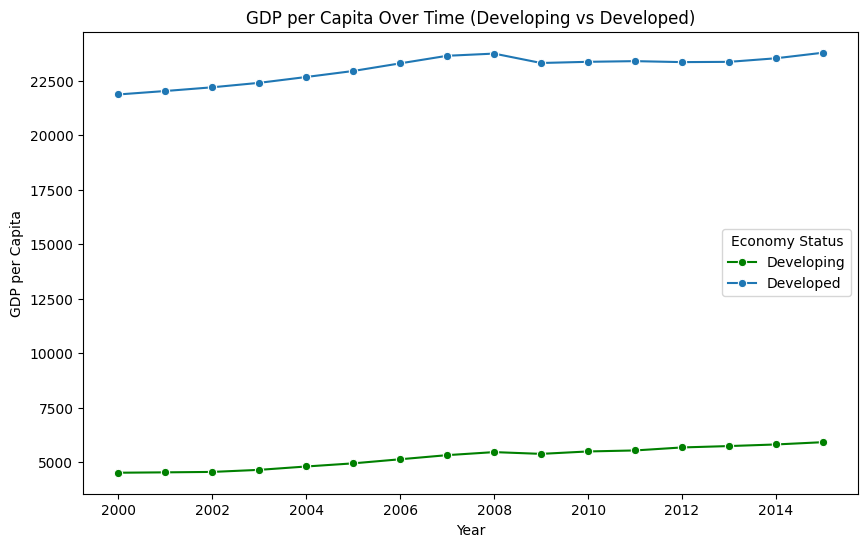

In [128]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="Year", y="GDP_per_capita", data=developing_df, ci=None, marker='o', color='green', label="Developing")

# GDP per Capita Trend for Developed Countries
sns.lineplot(x="Year", y="GDP_per_capita", data=developed_df,ci=None, label="Developed", marker='o')

plt.title("GDP per Capita Over Time (Developing vs Developed)")
plt.xlabel("Year")
plt.ylabel("GDP per Capita")
plt.legend(title="Economy Status")
plt.show

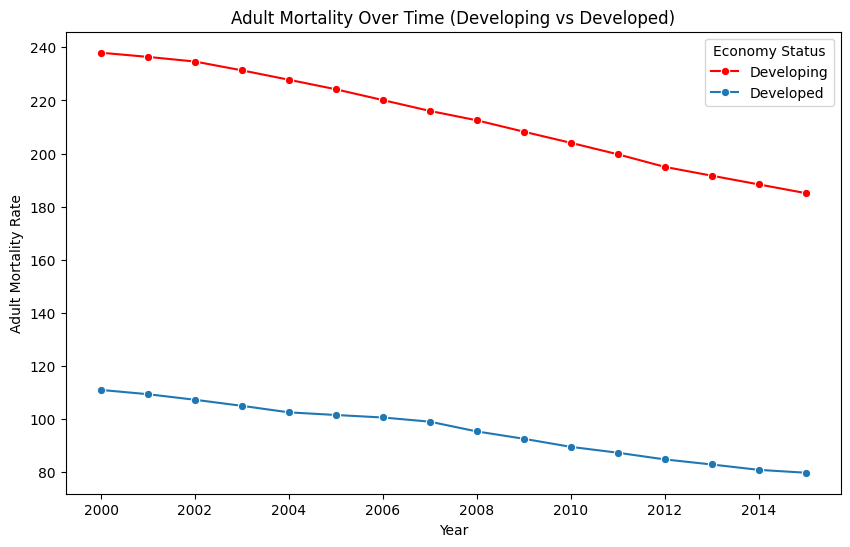

In [129]:
## Adult Mortality rate
plt.figure(figsize=(10,6))
sns.lineplot(x="Year", y="Adult_mortality", data=developing_df, ci=None, marker='o', color='red',label='Developing')
# Plot line chart for Developed countries
sns.lineplot(x="Year", y="Adult_mortality", data=developed_df,ci=None, label="Developed", marker='o')

plt.title("Adult Mortality Over Time (Developing vs Developed)")
plt.xlabel("Year")
plt.ylabel("Adult Mortality Rate")
plt.legend(title="Economy Status")
plt.show()


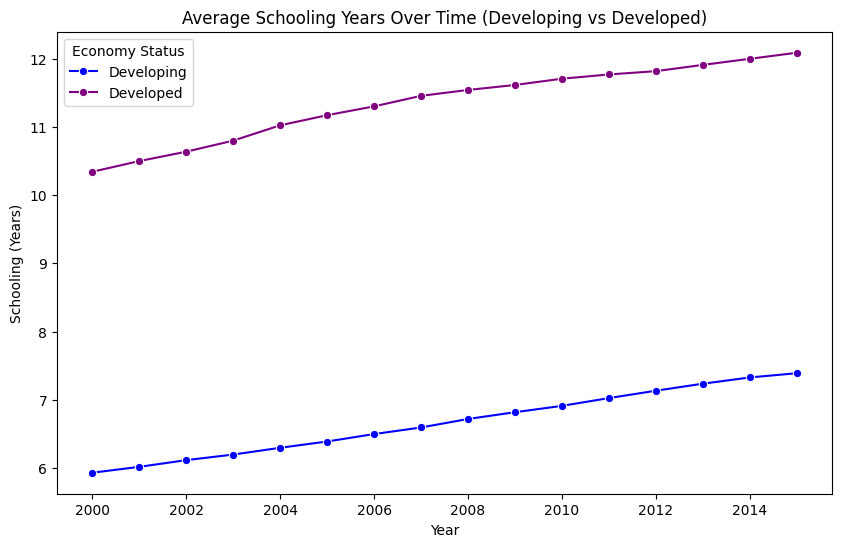

In [130]:
## Schooling Years over time
plt.figure(figsize=(10,6))
sns.lineplot(x="Year", y="Schooling", data=developing_df, ci=None, marker='o', color='blue',label='Developing')

sns.lineplot(x="Year", y="Schooling", data=developed_df, ci=None, marker='o', color='purple',label='Developed')
plt.title("Average Schooling Years Over Time (Developing vs Developed)")
plt.xlabel("Year")
plt.ylabel("Schooling (Years)")
plt.legend(title="Economy Status")
plt.show()



### 2.Analyzing Health and Well-being Trends

- How have HIV incidents changed?
- Are immunization rates improving?
- What are the trends in BMI and nutrition?

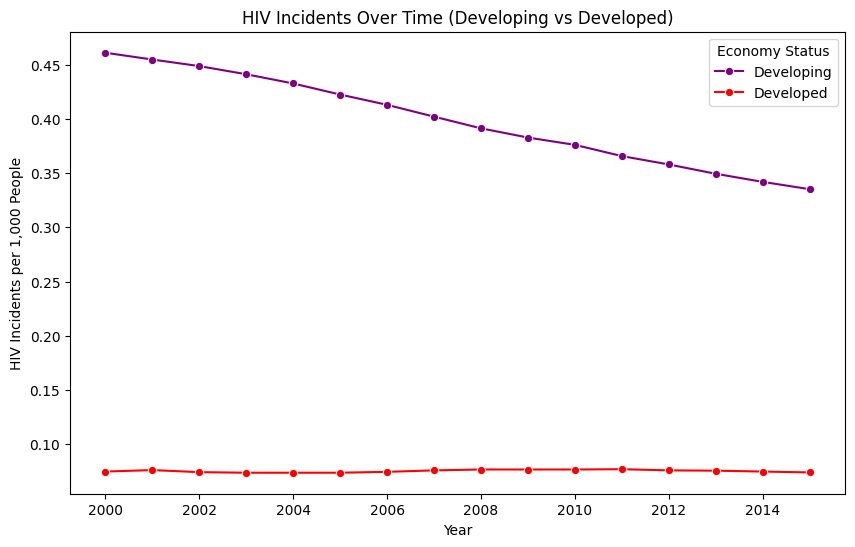

In [131]:
## HIV Incidents over time
plt.figure(figsize=(10,6))
sns.lineplot(x="Year", y="Incidents_HIV", data=developing_df, ci=None, marker='o', color='purple',label='Developing')

sns.lineplot(x="Year", y="Incidents_HIV", data=developed_df, ci=None, marker='o', color='red',label='Developed')
plt.title("HIV Incidents Over Time (Developing vs Developed)")
plt.xlabel("Year")
plt.ylabel("HIV Incidents per 1,000 People")
plt.legend(title="Economy Status")
plt.show()


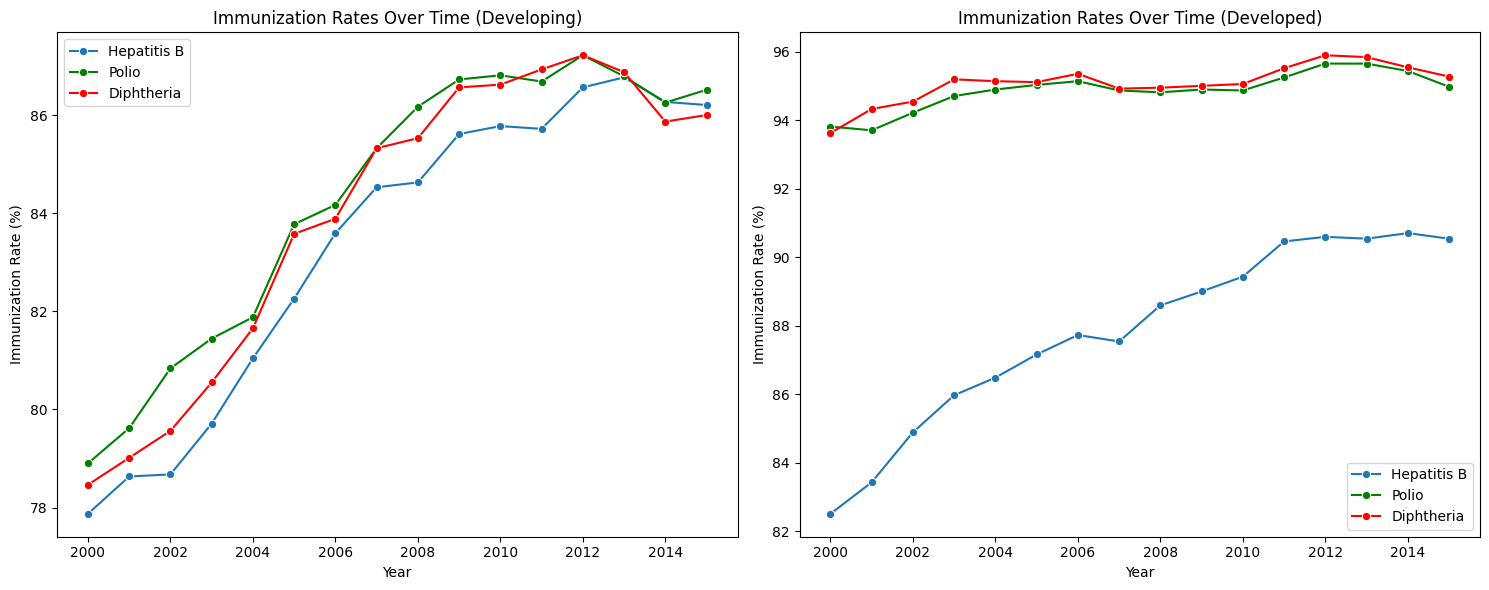

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming developing_df and developed_df are your DataFrames

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns

# Plot for Developing Countries (Left)
sns.lineplot(x="Year", y="Hepatitis_B", data=developing_df, ci=None, marker='o', label="Hepatitis B", ax=axes[0])
sns.lineplot(x="Year", y="Polio", data=developing_df, ci=None, marker='o', label="Polio", color='green', ax=axes[0])
sns.lineplot(x="Year", y="Diphtheria", data=developing_df, ci=None, marker='o', label="Diphtheria", color='red', ax=axes[0])
axes[0].set_title("Immunization Rates Over Time (Developing)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Immunization Rate (%)")
axes[0].legend()

# Plot for Developed Countries (Right)
sns.lineplot(x="Year", y="Hepatitis_B", data=developed_df, ci=None, marker='o', label="Hepatitis B", ax=axes[1])
sns.lineplot(x="Year", y="Polio", data=developed_df, ci=None, marker='o', label="Polio", color='green', ax=axes[1])
sns.lineplot(x="Year", y="Diphtheria", data=developed_df, ci=None, marker='o', label="Diphtheria", color='red', ax=axes[1])
axes[1].set_title("Immunization Rates Over Time (Developed)")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Immunization Rate (%)")
axes[1].legend()

plt.tight_layout() # Improves spacing between subplots
plt.show()

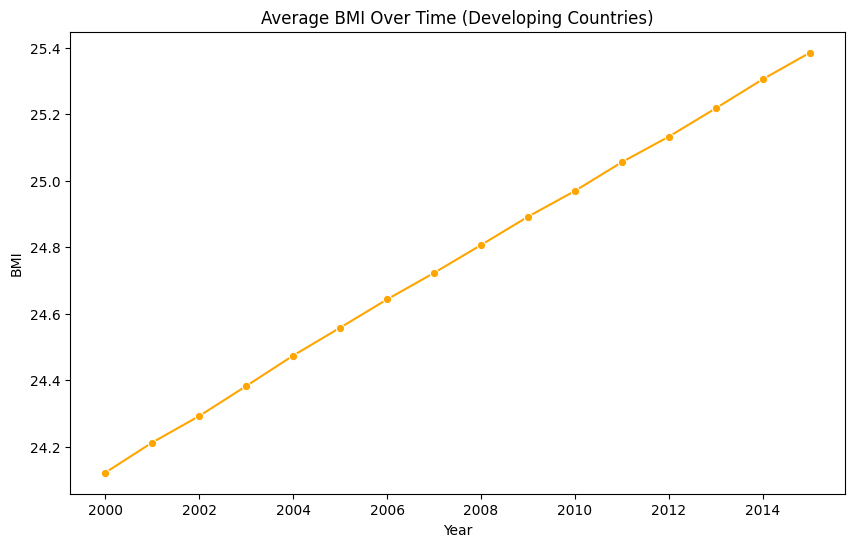

In [133]:
## BMI over time
plt.figure(figsize=(10,6))
sns.lineplot(x="Year", y="BMI", data=developing_df, ci=None, marker='o', color='orange')
plt.title("Average BMI Over Time (Developing Countries)")
plt.xlabel("Year")
plt.ylabel("BMI")
plt.show()


# Outliers Treatment
- Outlier treatment done for only continuous variables
- Outlier treatment is not done on Target,Categorical and Discrete Variable

In [31]:
# Identify numeric columns

numeric = ['Adult_mortality', 'Alcohol_consumption', 'Incidents_HIV', 'GDP_per_capita', 'Population_mln', 'Thinness_ten_nineteen_years'
, 'Thinness_five_nine_years'
, 'Schooling']

# Loop through each numeric column to find outliers

for col in numeric:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"Column: {col}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Outlier values:\n{outliers[col].values}\n")

Column: Adult_mortality
Number of outliers: 112
Outlier values:
[551.9115 515.718  463.613  686.639  579.801  528.2495 570.551  551.1775
 591.4675 521.085  687.993  496.836  485.3535 466.265  598.586  528.961
 459.6215 541.331  531.8035 494.617  617.2135 522.318  514.5715 468.51
 494.9685 513.4755 470.342  501.4985 532.8745 495.7265 703.     569.1065
 559.1865 594.7345 703.677  588.7775 459.654  523.723  518.279  587.989
 487.29   549.7965 606.731  579.412  624.685  569.503  597.7545 496.876
 500.1645 593.712  460.7075 592.0125 522.8285 548.4965 537.6    531.3245
 574.7605 538.191  591.9355 498.38   523.0825 561.532  581.009  615.708
 605.593  473.875  508.6085 542.026  461.2065 568.77   642.4155 519.6305
 471.7    462.512  507.937  507.805  555.8025 484.2665 499.055  488.1705
 505.4205 484.5165 468.8655 558.8015 531.4845 653.918  527.8865 494.388
 603.461  545.294  604.613  508.1255 498.352  570.632  507.0355 459.807
 497.9455 719.3605 483.806  487.278  480.3625 472.6675 629.815  470.

#### Applying Outlier Treatment on following Columns
- Adult_mortality
- Alcohol_consumption
- Incidents_HIV
- GDP_per_capita
- Thinness_ten_nineteen_years
- Thinness_five_nine_years
- Schooling

Population varies significantly across countries, 
- with highly populated nations like India and China naturally having extreme values.
- Since this is a real-world difference, we have kept all population values unchanged.

In [32]:
# checking relationship between population and life expectancy
df[['Population_mln', 'Life_expectancy']].corr()

Population_mln  Life_expectancy
Population_mln         1.000000         0.026298
Life_expectancy        0.026298         1.000000

In [33]:
## Capping the outliers
## DEFINING A FUNCTION TO CAP THE OUTLIERS

def whisker(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

# running the function for each column

for i in ['Adult_mortality', 'Alcohol_consumption', 'Incidents_HIV', 'GDP_per_capita', 'Thinness_ten_nineteen_years'
, 'Thinness_five_nine_years'
, 'Schooling']:
    lower, upper = whisker(i)
    df[i] = df[i].apply(lambda x: lower if x < lower else upper if x > upper else x)
    
    
    

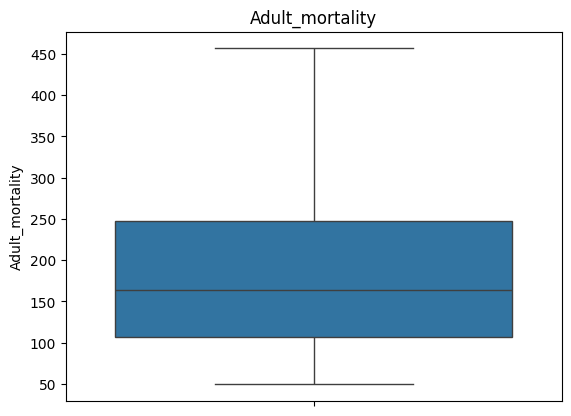

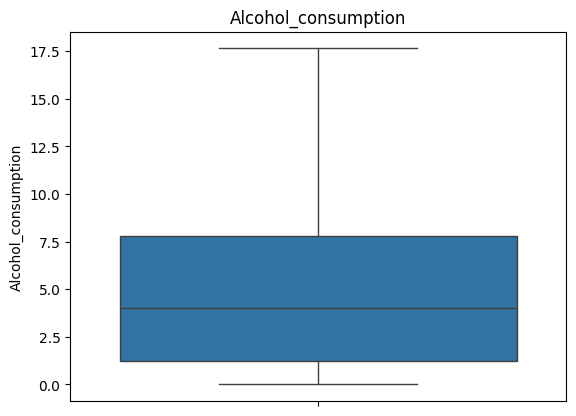

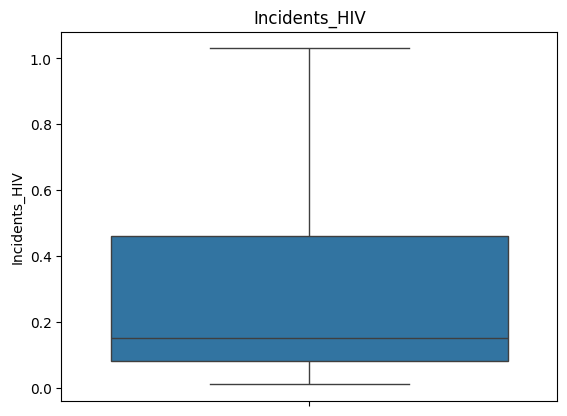

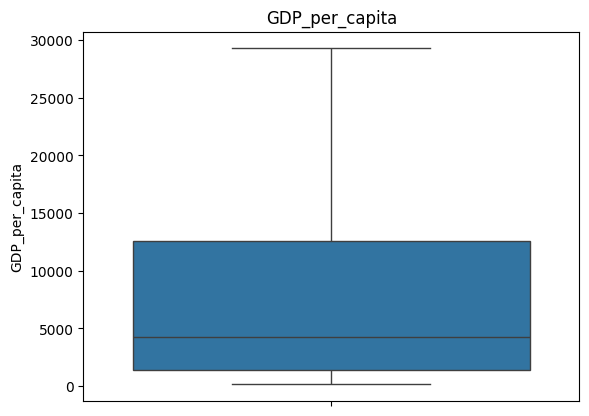

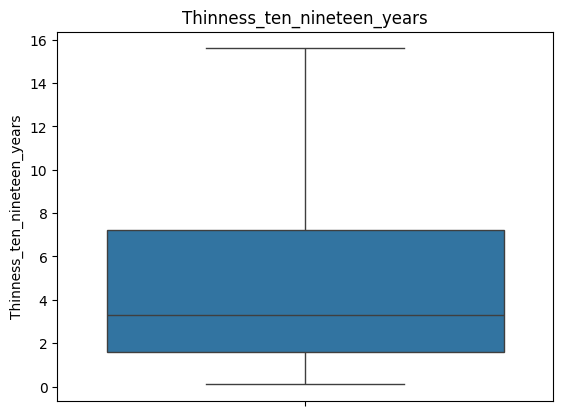

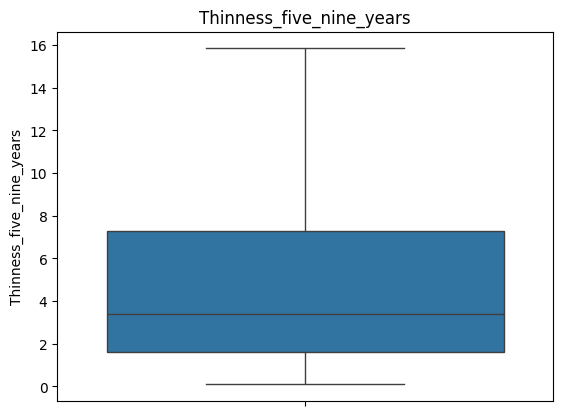

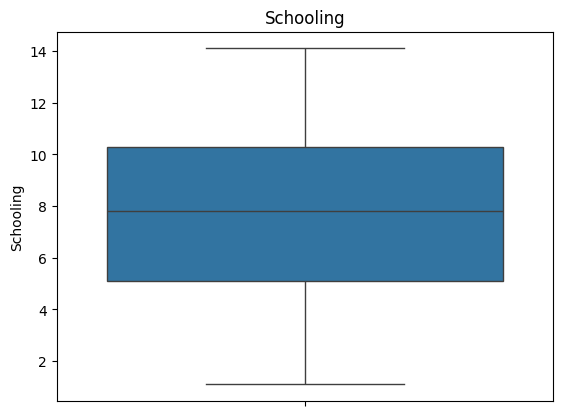

In [34]:
## visualizing the outliers

for i in ['Adult_mortality', 'Alcohol_consumption', 'Incidents_HIV', 'GDP_per_capita', 'Thinness_ten_nineteen_years'
, 'Thinness_five_nine_years','Schooling']:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

## Predicting Life Expectancy
- Selecting Feature and Target Variables

In [138]:
# Perform one-hot encoding for the 'Region' column
region_encoded = pd.get_dummies(df['Region'], prefix='Region', drop_first=True)

# Concatenate the encoded columns with the original dataframe
df = pd.concat([df, region_encoded], axis=1)

# Display the updated dataframe
print(df.head())

   Country          Region  Year  Infant_deaths  Under_five_deaths  \
0  Turkiye     Middle East  2015           11.1               13.0   
1    Spain  European Union  2015            2.7                3.3   
2    India            Asia  2007           51.5               67.9   
3   Guyana   South America  2006           32.8               40.5   
4   Israel     Middle East  2012            3.4                4.3   

   Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles   BMI  ...  \
0         105.8240                 1.32           97       65  27.8  ...   
1          57.9025                10.35           97       94  26.0  ...   
2         201.0765                 1.57           60       35  21.2  ...   
3         222.1965                 5.68           93       74  25.3  ...   
4          57.9510                 2.89           97       89  27.0  ...   

   Developed_label  Country_Count  Region_Asia  \
0       Developing              1        False   
1        Developed    

In [139]:
df.head()

Country          Region  Year  Infant_deaths  Under_five_deaths  \
0  Turkiye     Middle East  2015           11.1               13.0   
1    Spain  European Union  2015            2.7                3.3   
2    India            Asia  2007           51.5               67.9   
3   Guyana   South America  2006           32.8               40.5   
4   Israel     Middle East  2012            3.4                4.3   

   Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles   BMI  ...  \
0         105.8240                 1.32           97       65  27.8  ...   
1          57.9025                10.35           97       94  26.0  ...   
2         201.0765                 1.57           60       35  21.2  ...   
3         222.1965                 5.68           93       74  25.3  ...   
4          57.9510                 2.89           97       89  27.0  ...   

   Developed_label  Country_Count  Region_Asia  \
0       Developing              1        False   
1        Developed              1        False   
2       Developing              1         True   
3       Developing              1        False   
4        Developed              1        False   

   Region_Central America and Caribbean  Region_European Union  \
0                                 False                  False   
1                                 False                   True   
2                                 False                  False   
3                                 False                  False   
4                                 False                  False   

   Region_Middle East  Region_North America  Region_Oceania  \
0                True                 False           False   
1               False                 False           False   
2               False                 False           False   
3               False                 False           False   
4                True                 False           False   

   Region_Rest of Europe  Region_South America  
0                  False                 False  
1                  False                 False  
2                  False                 False  
3                  False                  True  
4                  False                 False  

[5 rows x 31 columns]

## 2️⃣ Feature Scaling (Standardization)
- Since different features have different ranges (e.g., GDP_per_capita is in thousands, while BMI is in tens).

In [219]:
from sklearn.preprocessing import StandardScaler


In [220]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)  # Apply standardization

# Convert back to DataFrame
features = pd.DataFrame(scaled_features, columns=features.columns)


In [257]:
## training model

# features=df[['Infant_deaths',
#        'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B',
#        'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita','Population_mln','Thinness_ten_nineteen_years',
#        'Thinness_five_nine_years', 'Schooling','Economy_status_Developed',
       
#         'Region_Asia', 'Region_Central America and Caribbean', 'Region_European Union',
#     'Region_Middle East', 'Region_North America', 'Region_Oceania', 
#     'Region_Rest of Europe', 'Region_South America' ]] # Newly added One-Hot Encoded Regions]
features=df.drop(columns=['Country', 'Region', 'Year', 'Under_five_deaths','Polio', 'Diphtheria',
'Measles', 'Population_mln','GDP_per_capita',
       'Economy_status_Developing', 'Life_expectancy', 'Developed_label',
       'Country_Count','Adult_mortality','Under_five_deaths','Infant_deaths']
)
target=df['Life_expectancy']

In [199]:
df.columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy', 'Developed_label',
       'Country_Count', 'Region_Asia', 'Region_Central America and Caribbean',
       'Region_European Union', 'Region_Middle East', 'Region_North America',
       'Region_Oceania', 'Region_Rest of Europe', 'Region_South America'],
      dtype='object')

- Spliting Data into Training and Testing

In [258]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)

- Fitting in Linear Model

In [259]:
lm=LinearRegression()
lm.fit(x_train,y_train)


LinearRegression()

- Predicting Values

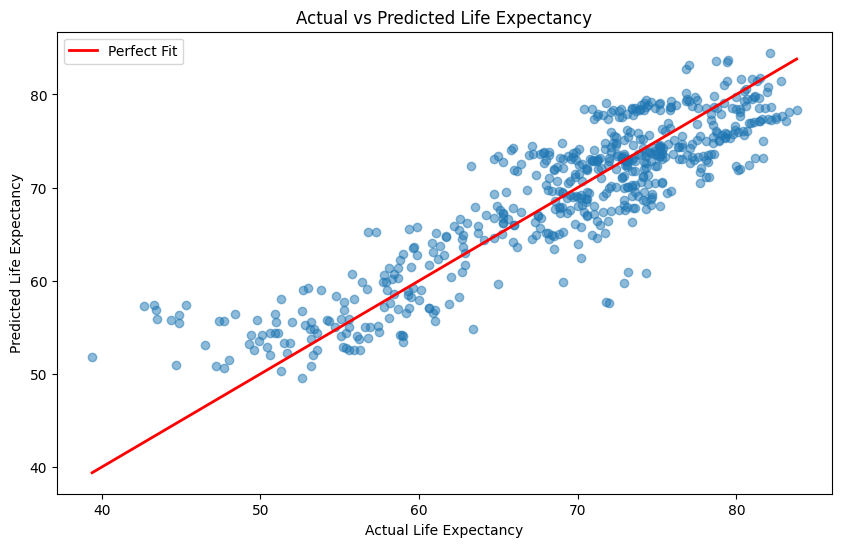

In [260]:
# Predicting the values
y_pred = lm.predict(x_test)

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', linewidth=2, label="Perfect Fit")  # Red diagonal line

plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs Predicted Life Expectancy")
plt.legend()
plt.show()


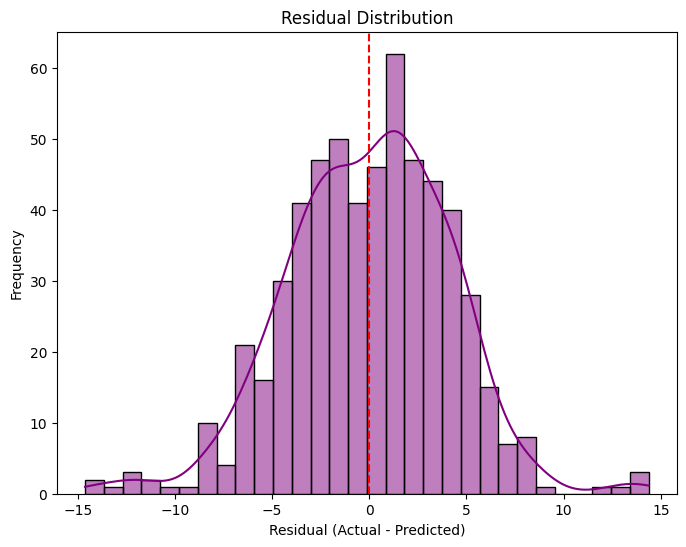

In [261]:
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, bins=30, color="purple")
plt.axvline(0, color='red', linestyle='--')
plt.title("Residual Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()


- Checking Score

In [262]:
# Checking the score of the model
train_score = lm.score(x_train, y_train)
test_score = lm.score(x_test, y_test)

print(f"Training Score: {train_score}")
print(f"Testing Score: {test_score}")

Training Score: 0.8218466765859748
Testing Score: 0.7905626176775016


In [263]:
# Checking the score of the model
train_score = lm.score(x_train, y_train)
test_score = lm.score(x_test, y_test)

print(f"Training Score: {train_score}")
print(f"Testing Score: {test_score}")

Training Score: 0.8218466765859748
Testing Score: 0.7905626176775016


In [264]:


# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = math.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 17.38146048448092
Root Mean Squared Error (RMSE): 4.169107876330489
Mean Absolute Error (MAE): 3.3072775137049764


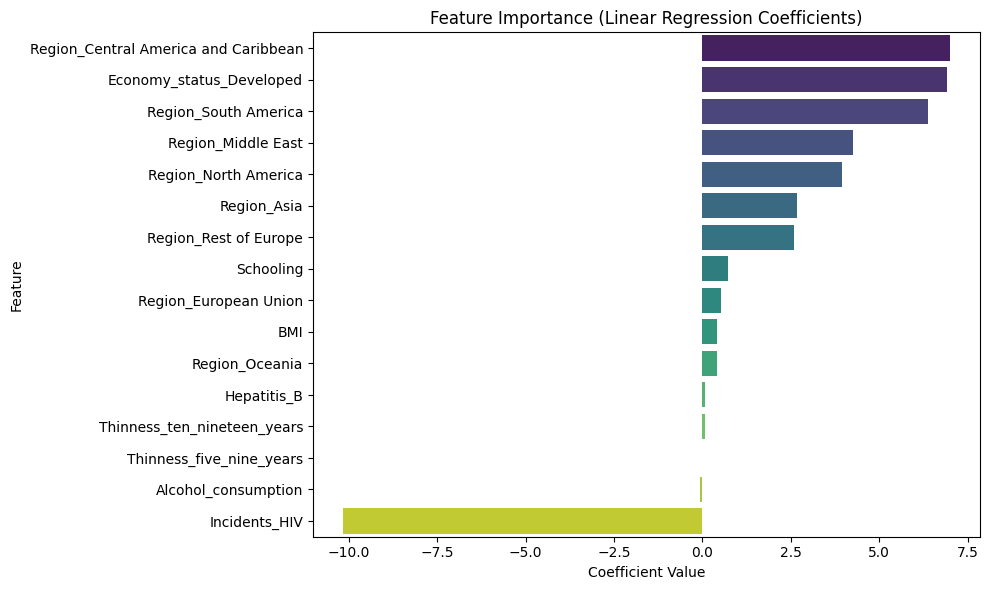

In [265]:
# Extracting feature importance (coefficients) from the linear regression model
coefficients = lm.coef_

# Creating a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': coefficients
}).sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [266]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

rf_test_score = rf.score(x_test, y_test)

rf_train_score = rf.score(x_train, y_train)
print(f"Random Forest Test Score: {rf_test_score}")
print(f"Random Forest Train Score: {rf_train_score}")


Random Forest Test Score: 0.9772977730068947
Random Forest Train Score: 0.9962912932289604


In [267]:
pd.set_option('display.max_columns', None)
df.head()

Country          Region  Year  Infant_deaths  Under_five_deaths  \
0  Turkiye     Middle East  2015           11.1               13.0   
1    Spain  European Union  2015            2.7                3.3   
2    India            Asia  2007           51.5               67.9   
3   Guyana   South America  2006           32.8               40.5   
4   Israel     Middle East  2012            3.4                4.3   

   Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles   BMI  Polio  \
0         105.8240                 1.32           97       65  27.8     97   
1          57.9025                10.35           97       94  26.0     97   
2         201.0765                 1.57           60       35  21.2     67   
3         222.1965                 5.68           93       74  25.3     92   
4          57.9510                 2.89           97       89  27.0     94   

   Diphtheria  Incidents_HIV  GDP_per_capita  Population_mln  \
0          97           0.08       11006.000           78.53   
1          97           0.09       25742.000           46.44   
2          64           0.13        1076.000         1183.21   
3          93           0.79        4146.000            0.75   
4          94           0.08       29268.875            7.91   

   Thinness_ten_nineteen_years  Thinness_five_nine_years  Schooling  \
0                          4.9                      4.80        7.8   
1                          0.6                      0.50        9.7   
2                         15.6                     15.85        5.0   
3                          5.7                      5.50        7.9   
4                          1.2                      1.10       12.8   

   Economy_status_Developed  Economy_status_Developing  Life_expectancy  \
0                         0                          1             76.5   
1                         1                          0             82.8   
2                         0                          1             65.4   
3                         0                          1             67.0   
4                         1                          0             81.7   

  Developed_label  Country_Count  Region_Asia  \
0      Developing              1        False   
1       Developed              1        False   
2      Developing              1         True   
3      Developing              1        False   
4       Developed              1        False   

   Region_Central America and Caribbean  Region_European Union  \
0                                 False                  False   
1                                 False                   True   
2                                 False                  False   
3                                 False                  False   
4                                 False                  False   

   Region_Middle East  Region_North America  Region_Oceania  \
0                True                 False           False   
1               False                 False           False   
2               False                 False           False   
3               False                 False           False   
4                True                 False           False   

   Region_Rest of Europe  Region_South America  
0                  False                 False  
1                  False                 False  
2                  False                 False  
3                  False                  True  
4                  False                 False

In [268]:
from sklearn.model_selection import cross_val_score

# For Linear Regression
lm_scores = cross_val_score(lm, features, target, cv=5, scoring='r2')
print(f"Linear Regression CV R²: {lm_scores.mean():.3f} ± {lm_scores.std():.3f}")

# For Random Forest
rf_scores = cross_val_score(rf, features, target, cv=5, scoring='r2')
print(f"Random Forest CV R²: {rf_scores.mean():.3f} ± {rf_scores.std():.3f}")

Linear Regression CV R²: 0.814 ± 0.008
Random Forest CV R²: 0.977 ± 0.004


In [239]:
# Check for features with ~1.0 correlation to target

print(c['Life_expectancy'].sort_values(ascending=False))

Life_expectancy                1.000000
Schooling                      0.732484
Polio                          0.641217
Diphtheria                     0.627541
BMI                            0.598423
GDP_per_capita                 0.583090
Economy_status_Developed       0.523791
Measles                        0.490019
Hepatitis_B                    0.417804
Alcohol_consumption            0.399159
Year                           0.174359
Population_mln                 0.026298
Thinness_five_nine_years      -0.458166
Thinness_ten_nineteen_years   -0.467824
Economy_status_Developing     -0.523791
Incidents_HIV                 -0.553027
Infant_deaths                 -0.920032
Under_five_deaths             -0.920419
Adult_mortality               -0.945360
Country_Count                       NaN
Name: Life_expectancy, dtype: float64


Text(0.5, 1.0, 'Sanity Check: Feature-Target Relationship')

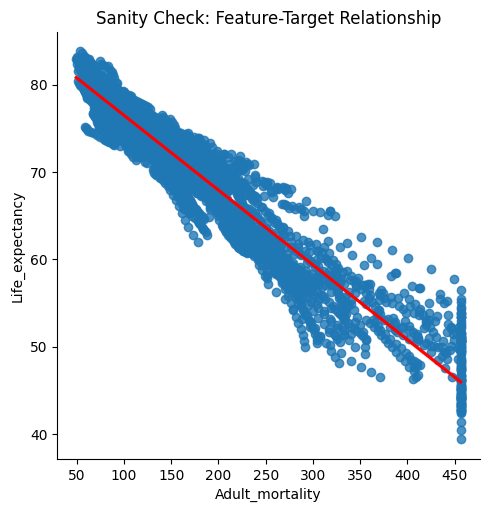

In [269]:
# Plot remaining top feature vs target
sns.lmplot(x='Adult_mortality', y='Life_expectancy', data=df, line_kws={'color': 'red'})
plt.title('Sanity Check: Feature-Target Relationship')

Text(0, 0.5, 'Predicted')

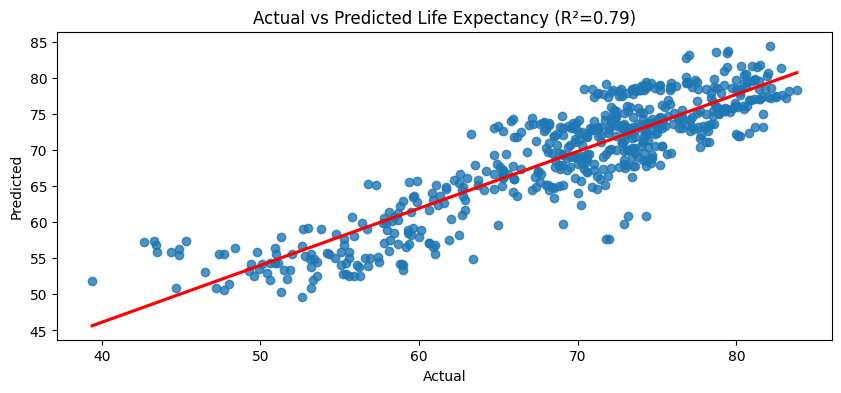

In [270]:
plt.figure(figsize=(10,4))
sns.regplot(x=y_test, y=lm.predict(x_test), 
            line_kws={'color':'red'}, ci=None)
plt.title(f"Actual vs Predicted Life Expectancy (R²={lm.score(x_test,y_test):.2f})")
plt.xlabel("Actual")
plt.ylabel("Predicted")